In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, lognorm, expon, geom, poisson
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import levene, shapiro, kstest, f_oneway, chi2_contingency, chi2, chisquare, kruskal, pearsonr, spearmanr, boxcox
from statsmodels.graphics.gofplots import qqplot
import unicodedata
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('delhivery_data.csv')

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## `Shape of Data`: There are 144867 rows and 24 columns.

In [4]:
df.shape

(144867, 24)

## `Missing Values`

In [5]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

### `There are 293 missing values in column "source_name" and 261 in column "destination_name"`
### `We can fill missing values with "Unknown" as any other imputation will not be right`

In [6]:
df.fillna('Unknown', inplace = True)

## `Visual exploration of data types of columns of the dataset`

In [7]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

## `Data Type Conversions`

In [8]:
df[['data', 'route_schedule_uuid', 'route_type', 
    'trip_uuid', 'source_center', 'source_name',
    'destination_center', 'destination_name']] = df[['data', 'route_schedule_uuid', 'route_type', 
                                                     'trip_uuid', 'source_center', 'source_name', 
                                                     'destination_center', 'destination_name']].astype('object')

In [9]:
df[['trip_creation_time', 'od_start_time',
    'od_end_time', 'cutoff_timestamp']] = df[['trip_creation_time', 'od_start_time',
                                              'od_end_time', 'cutoff_timestamp']].astype('datetime64[ns]')

In [10]:
df[['cutoff_factor', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance', 'factor',
    'segment_actual_time', 'segment_osrm_time',
    'segment_osrm_distance', 'segment_factor']] = df[['cutoff_factor', 'actual_distance_to_destination',
                                                      'actual_time', 'osrm_time', 'osrm_distance', 'factor',
                                                      'segment_actual_time', 'segment_osrm_time',
                                                      'segment_osrm_distance', 'segment_factor']].astype('float64')

In [11]:
df['is_cutoff'] = df['is_cutoff'].astype('bool')

## `Merging rows`: As we can clearly see that delivery details of one package are divided into several rows, so we can aggregate them.

### `Aggregation on level 1 : On "trip_uuid", "source_name", "destination_name"`

In [12]:
def calculate_stops_count(factors):
    return len(factors) - 1

In [13]:
data_agg = (df.groupby(["trip_creation_time", "trip_uuid", 
                        "source_center", "source_name", 
                        "destination_center", "destination_name"]).agg({"route_type": "max", 
                                                                        "od_start_time": "max", 
                                                                        "od_end_time": "max", 
                                                                        "actual_distance_to_destination": "max", 
                                                                        "start_scan_to_end_scan": "max", 
                                                                        "osrm_distance": "max", 
                                                                        "actual_time": "max", 
                                                                        "osrm_time" : "max", 
                                                                        "segment_actual_time": "sum",
                                                                        "segment_osrm_time": "sum",
                                                                        "segment_osrm_distance": "sum",
                                                                        "factor": calculate_stops_count})
            .reset_index().rename(columns = {"factor": "segments",
                                            "segment_actual_time": "segment_actual_time_total",
                                            "segment_osrm_time": "segment_osrm_time_total",
                                            "segment_osrm_distance": "segment_osrm_distance_total"}).sort_values(['trip_uuid', 'od_start_time']))

In [14]:
data_agg

,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,route_type,od_start_time,od_end_time,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
1,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,440.973689,999.0,544.8027,830.0,394.0,820.0,474.0,649.8528,20
0,2018-09-12 00:00:16.535741,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,383.759164,1260.0,446.5496,732.0,349.0,728.0,534.0,670.6205,17
3,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,48.542890,122.0,56.9116,96.0,42.0,95.0,39.0,55.9899,5
2,2018-09-12 00:00:22.886430,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,24.644021,58.0,28.1994,47.0,26.0,46.0,26.0,28.1995,2
5,2018-09-12 00:00:33.691250,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,1689.964663,3099.0,2090.8743,2736.0,1529.0,2700.0,1710.0,2227.5270,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,2018-10-03 23:59:14.390954,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,33.627182,62.0,42.5213,51.0,41.0,49.0,42.0,42.1431,3
26362,2018-10-03 23:59:14.390954,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Carting,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,17.373209,45.0,25.7087,33.0,31.0,32.0,30.0,25.7087,1
26364,2018-10-03 23:59:14.390954,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,33.673835,91.0,40.6080,90.0,48.0,89.0,77.0,78.5869,3
26367,2018-10-03 23:59:42.701692,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),FTL,2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,25.534793,66.0,28.0484,42.0,26.0,41.0,25.0,28.0484,1


### `Aggregation on Level 2 - On "trip_uuid"`

In [15]:
def my_first(vals):
    return vals.iloc[0]
def my_last(vals):
    return vals.iloc[-1]

In [16]:
final_data = (data_agg.groupby(['trip_creation_time', 'trip_uuid']).agg({"source_center": my_first, 
                                                                         "source_name": my_first, 
                                                                         "destination_center": my_last, 
                                                                         "destination_name": my_last, 
                                                                         "route_type": "max",
                                                                         "od_start_time": my_first,
                                                                         "od_end_time": my_last,
                                                                         "actual_distance_to_destination": "sum",
                                                                         "start_scan_to_end_scan": "sum",
                                                                         "osrm_distance": "sum",
                                                                         "actual_time": "sum",
                                                                         "osrm_time": "sum",
                                                                         "segment_actual_time_total": "sum",
                                                                         "segment_osrm_time_total": "sum", 
                                                                         "segment_osrm_distance_total": "sum",
                                                                         "segments": "sum"})).reset_index()

In [17]:
final_data

,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,route_type,od_start_time,od_end_time,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
0,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,824.732854,2259.0,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733,37
1,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,73.186911,180.0,85.1110,143.0,68.0,141.0,65.0,84.1894,7
2,2018-09-12 00:00:33.691250,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1932.273969,3933.0,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678,87
3,2018-09-12 00:01:00.113710,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,100.0,19.6800,59.0,15.0,59.0,16.0,19.8766,1
4,2018-09-12 00:02:09.740725,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,127.448500,717.0,146.7918,341.0,117.0,340.0,115.0,146.7919,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,2018-10-03 23:55:56.258533,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,57.762332,257.0,73.4630,83.0,62.0,82.0,62.0,64.8551,5
14813,2018-10-03 23:57:23.863155,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,60.0,16.0882,21.0,12.0,21.0,11.0,16.0883,1
14814,2018-10-03 23:57:44.429324,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Carting,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,38.684839,421.0,63.2841,282.0,54.0,281.0,88.0,104.8866,4
14815,2018-10-03 23:59:14.390954,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Carting,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,134.723836,347.0,177.6635,264.0,184.0,258.0,221.0,223.5324,12


### `Dropping those rows where "source_name" or "destination_name" is "Unknown (earlier imputed for nulls)"`

In [18]:
final_data = final_data[(final_data['source_name'] != 'Unknown') & (final_data['destination_name'] != 'Unknown')]

In [19]:
final_data.head()

,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,route_type,od_start_time,od_end_time,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
0,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,824.732854,2259.0,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733,37
1,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,73.186911,180.0,85.1110,143.0,68.0,141.0,65.0,84.1894,7
2,2018-09-12 00:00:33.691250,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1932.273969,3933.0,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678,87
3,2018-09-12 00:01:00.113710,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,100.0,19.6800,59.0,15.0,59.0,16.0,19.8766,1
4,2018-09-12 00:02:09.740725,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,127.448500,717.0,146.7918,341.0,117.0,340.0,115.0,146.7919,4


## `Feature Engineering`

## `1. Extracting City, Place, Code, and State from "destination_name"`

In [20]:
destination_data = final_data['destination_name'].str.split('_', n = 3, expand = True).rename(columns = {0: "City",
                                                                                        1: "Place",
                                                                                        2: "Code",
                                                                                        3: "State"}).fillna('')

In [21]:
for col in destination_data.columns:
    destination_data[col] = destination_data[col].apply(lambda val: val if val is not None else np.nan)

In [22]:
destination_data

,City,Place,Code,State
0,Gurgaon,Bilaspur,HB (Haryana),
1,Chikblapur,ShntiSgr,D (Karnataka),
2,Chandigarh,Mehmdpur,H (Punjab),
3,Mumbai,MiraRd,IP (Maharashtra),
4,Bellary,Dc (Karnataka),,
...,...,...,...,...
14812,Chandigarh,Mehmdpur,H (Punjab),
14813,Faridabad,Blbgarh,DC (Haryana),
14814,Kanpur,Central,H,6 (Uttar Pradesh)
14815,Tirunelveli,VdkkuSrt,I (Tamil Nadu),


In [23]:
def extract_btw_brackets(string):
    if string != string:
        return np.nan
    try:
        start = string.index('(') + 1
        stop = string.index(')') - 1
        state = string[start: stop + 1]
        return state
    except ValueError:
        return np.nan   

In [24]:
def delete_btw_brackets(string):
    if string != string:
        return np.nan
    try:
        start = string.index('(') + 1
        stop = string.index(')') - 1
        state = string[start: stop + 1]
        return string.replace('(', '').replace(')', '').replace(state, '').strip()
    except ValueError:
        return string 

### `Populating "State" column from records where value of "State" is residing in "Code" column`

In [25]:
state_in_code_col_index = list(destination_data[destination_data['Code'].str.contains('(', regex = False)].index)

In [26]:
destination_data.loc[state_in_code_col_index, 'State'] = list(destination_data.loc[state_in_code_col_index, 'Code'].apply(extract_btw_brackets).values)
destination_data.loc[state_in_code_col_index, 'Code'] = destination_data.loc[state_in_code_col_index, 'Code'].apply(delete_btw_brackets)

### `Populating "State" column from records where value of "State" is residing in "Place" column`

In [27]:
state_in_place_col_index = list(destination_data[destination_data['Place'].str.contains('(', regex = False)].index)

In [28]:
destination_data.loc[state_in_place_col_index, 'State'] = list(destination_data.loc[state_in_place_col_index, 'Place'].apply(extract_btw_brackets).values)
destination_data.loc[state_in_place_col_index, 'Place'] = destination_data.loc[state_in_place_col_index, 'Place'].apply(delete_btw_brackets)

### `Populating "State" column from records where value of "State" is residing in "City" column`

In [29]:
state_in_city_col_index = list(destination_data[destination_data['City'].str.contains('(', regex = False)].index)

In [30]:
destination_data.loc[state_in_city_col_index, 'State'] = list(destination_data.loc[state_in_city_col_index, 'City'].apply(extract_btw_brackets).values)
destination_data.loc[state_in_city_col_index, 'City'] = destination_data.loc[state_in_city_col_index, 'City'].apply(delete_btw_brackets)

### `Removing all leading and trailing whitespaces`

In [31]:
for col in destination_data.columns:
    destination_data[col] = destination_data[col].str.strip()

### `Populating "Place" column from records where a part of "Place" is residing in "Code" column`

In [32]:
destination_data['Code'].unique()

array(['HB', 'D', 'H', 'IP', '', 'Dc', 'I', 'DPP', 'DPC', 'DC', 'L',
       'Nagar', 'PC', 'Pc', 'RPC', 'P', 'GW', 'Gateway', 'INT', 'M', 'R',
       'C', 'Layout', 'CP'], dtype=object)

In [33]:
place_in_code_index = list(destination_data[destination_data['Code'].isin(['Nagar', 'Gateway', 'Layout'])].index)

In [34]:
destination_data.loc[place_in_code_index][:10]

,City,Place,Code,State
85,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
123,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
396,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
418,Surat,Pandesra,Gateway,Gujarat
430,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
477,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
540,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
619,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
724,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
847,GZB,Mohan,Nagar,DPC (Uttar Pradesh)


In [35]:
destination_data.loc[place_in_code_index, 'Place'] = list((destination_data.loc[place_in_code_index, 'Place'] 
                                                           + ' ' 
                                                           + destination_data.loc[place_in_code_index, 'Code']).values)

In [36]:
destination_data.loc[place_in_code_index, 'Code'] = ''

In [37]:
destination_data.loc[place_in_code_index][:10]

,City,Place,Code,State
85,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
123,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
396,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
418,Surat,Pandesra Gateway,,Gujarat
430,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
477,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
540,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
619,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
724,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
847,GZB,Mohan Nagar,,DPC (Uttar Pradesh)


### `Populating "Code" column from records where a part of "Code" is residing in "State" column`

In [38]:
destination_data.loc[destination_data['State'].str.contains('(', regex = False)]

,City,Place,Code,State
8,Surat,Central,I,4 (Gujarat)
16,Jaipur,Central,I,7 (Rajasthan)
17,Satna,Central,I,2 (Madhya Pradesh)
20,Kanpur,Central,H,6 (Uttar Pradesh)
22,Surat,Central,I,4 (Gujarat)
...,...,...,...,...
14804,Kanpur,Central,H,6 (Uttar Pradesh)
14805,Mumbai,East,I,21 (Maharashtra)
14806,Mumbai,East,I,21 (Maharashtra)
14808,Mumbai,East,I,21 (Maharashtra)


In [39]:
def get_code_from_state(state):
    return state[: state.index('(')].strip()

In [40]:
code_in_state_col_index = list(destination_data[destination_data['State'].str.contains('(', regex = False)].index)

In [41]:
destination_data.loc[code_in_state_col_index, 'Code'] = list((destination_data.loc[code_in_state_col_index, 'Code'] 
                                                              + destination_data.loc[code_in_state_col_index, 'State'].apply(get_code_from_state))
                                                             .values)

In [42]:
destination_data.loc[code_in_state_col_index, 'State'] = list(destination_data.loc[code_in_state_col_index, 'State'].apply(extract_btw_brackets).values)

In [43]:
destination_data.loc[code_in_state_col_index]

,City,Place,Code,State
8,Surat,Central,I4,Gujarat
16,Jaipur,Central,I7,Rajasthan
17,Satna,Central,I2,Madhya Pradesh
20,Kanpur,Central,H6,Uttar Pradesh
22,Surat,Central,I4,Gujarat
...,...,...,...,...
14804,Kanpur,Central,H6,Uttar Pradesh
14805,Mumbai,East,I21,Maharashtra
14806,Mumbai,East,I21,Maharashtra
14808,Mumbai,East,I21,Maharashtra


### `Populating "Code" column from records where a part of it is residing in "City" column`

In [44]:
code_in_city_col_index = list(destination_data.loc[destination_data['City'].str.contains(' ', regex = False)].index)

In [45]:
destination_data.loc[code_in_city_col_index]

,City,Place,Code,State
7,HBR Layout PC,,,Karnataka
10,PNQ Rahatani DPC,,,Maharashtra
110,Mumbai Hub,,,Maharashtra
119,HBR Layout PC,,,Karnataka
139,PNQ Rahatani DPC,,,Maharashtra
...,...,...,...,...
14660,PNQ Vadgaon Sheri DPC,,,Maharashtra
14669,Mumbai Hub,,,Maharashtra
14697,Mumbai Hub,,,Maharashtra
14715,Mumbai Hub,,,Maharashtra


In [46]:
def get_code_from_city(city):
    if city == '':
        return city
    city = city.split()
    last_charset = city[-1]
    if len(last_charset) <= 3 and last_charset.casefold() != 'hub':
        return last_charset
    else:
        return ''

In [47]:
def del_code_from_city(city):
    city = city.split()
    last_charset = city[-1]
    if len(last_charset) <= 3 and last_charset.casefold() != 'hub':
        city.pop(-1)
    return ' '.join(city)    

In [48]:
destination_data.loc[code_in_city_col_index, 'Code'] = list(destination_data.loc[code_in_city_col_index, 'City']
                                                                  .apply(get_code_from_city).values)

In [49]:
destination_data.loc[code_in_city_col_index, 'City'] = list(destination_data.loc[code_in_city_col_index, 'City'].apply(del_code_from_city).values)

In [50]:
destination_data.loc[code_in_city_col_index, ['City', 'Place']] = list(destination_data.loc[code_in_city_col_index, 'City']
                                                                       .str.split(' ', n = 1, expand = True).values)

In [51]:
final_data.loc[:, ['destination_city', 'destination_place', 'destination_code', 'destination_state']] = list(destination_data.values)

C:\Users\U403439\AppData\Local\Temp\ipykernel_43516\2394694693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, ['destination_city', 'destination_place', 'destination_code', 'destination_state']] = list(destination_data.values)


In [52]:
final_data.loc[(final_data['destination_place'].str.len() < 3)
               & (final_data['destination_code'] == ''), ['destination_place',
                                                          'destination_code']] = list(final_data.loc[(final_data['destination_place'].str.len() < 3) 
                                                                                                     & (final_data['destination_code'] == ''), 
                                                                                                     ['destination_code', 'destination_place']].values)

In [53]:
city_mapping = {'GZB': 'Ghaziabad',
                'FBD': 'Faridabad',
                'GGN': 'Gurgaon',
                'Del': 'Delhi',
                'AMD': 'Ahmedabad',
                'Hyd': 'Hyderabad',
                'Amd': 'Ahmedabad',
                'BOM': 'Mumbai', 
                'Bangalore': 'Bengaluru'}

In [54]:
final_data['destination_city'] = final_data['destination_city'].apply(lambda city: city_mapping[city] if city in city_mapping else city)

final_data.loc[(final_data['destination_state'] == 'Delhi') 
                 & (final_data['destination_city'] != 'Delhi'),
                 'destination_place'] = list(final_data.loc[(final_data['destination_state'] == 'Delhi') 
                                                              & (final_data['destination_city'] != 'Delhi'), 'destination_city'].values)

final_data.loc[(final_data['destination_state'] == 'Delhi') & (final_data['destination_city'] != 'Delhi'), 'destination_city'] = 'Delhi'

C:\Users\U403439\AppData\Local\Temp\ipykernel_43516\219559599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['destination_city'] = final_data['destination_city'].apply(lambda city: city_mapping[city] if city in city_mapping else city)


## `2. Extracting City, Place, Code, and State from "source_name"`

In [55]:
source_data = final_data['source_name'].str.split('_', n = 3, expand = True).rename(columns = {0: "City", 
                                                                                               1: "Place", 
                                                                                               2: "Code", 
                                                                                               3: "State"}).fillna('')

In [56]:
source_data

,City,Place,Code,State
0,Bhopal,Trnsport,H (Madhya Pradesh),
1,Tumkur,Veersagr,I (Karnataka),
2,Bangalore,Nelmngla,H (Karnataka),
3,Mumbai Hub (Maharashtra),,,
4,Bellary,Dc (Karnataka),,
...,...,...,...,...
14812,Chandigarh,Mehmdpur,H (Punjab),
14813,FBD,Balabhgarh,DPC (Haryana),
14814,Kanpur,Central,H,6 (Uttar Pradesh)
14815,Tirunelveli,VdkkuSrt,I (Tamil Nadu),


In [57]:
def extract_btw_brackets(string):
    if string != string:
        return np.nan
    try:
        start = string.index('(') + 1
        stop = string.index(')') - 1
        state = string[start: stop + 1]
        return state
    except ValueError:
        return np.nan   

In [58]:
def delete_btw_brackets(string):
    if string != string:
        return np.nan
    try:
        start = string.index('(') + 1
        stop = string.index(')') - 1
        state = string[start: stop + 1]
        return string.replace('(', '').replace(')', '').replace(state, '').strip()
    except ValueError:
        return string 

### `Populating "State" column from records where value of "State" is residing in "Code" column`

In [59]:
state_in_code_col_index_2 = list(source_data[source_data['Code'].str.contains('(', regex = False)].index)

In [60]:
source_data.loc[state_in_code_col_index_2]

,City,Place,Code,State
0,Bhopal,Trnsport,H (Madhya Pradesh),
1,Tumkur,Veersagr,I (Karnataka),
2,Bangalore,Nelmngla,H (Karnataka),
5,Chennai,Porur,DPC (Tamil Nadu),
6,Chennai,Chrompet,DPC (Tamil Nadu),
...,...,...,...,...
14807,Vadodara,Karelibaug,DPC (Gujarat),
14809,Chennai,Porur,DPC (Tamil Nadu),
14812,Chandigarh,Mehmdpur,H (Punjab),
14813,FBD,Balabhgarh,DPC (Haryana),


In [61]:
source_data.loc[state_in_code_col_index_2, 'State'] = list(source_data.loc[state_in_code_col_index_2, 'Code'].apply(extract_btw_brackets).values)
source_data.loc[state_in_code_col_index_2, 'Code'] = source_data.loc[state_in_code_col_index_2, 'Code'].apply(delete_btw_brackets)

### `Populating "State" column from records where value of "State" is residing in "Place" column`

In [62]:
state_in_place_col_index_2 = list(source_data[source_data['Place'].str.contains('(', regex = False)].index)

In [63]:
source_data.loc[state_in_place_col_index_2, 'State'] = list(source_data.loc[state_in_place_col_index_2, 'Place']
                                                            .apply(extract_btw_brackets).values)
source_data.loc[state_in_place_col_index_2, 'Place'] = source_data.loc[state_in_place_col_index_2, 'Place'].apply(delete_btw_brackets)

### `Populating "State" column from records where value of "State" is residing in "City" column`

In [64]:
state_in_city_col_index_2 = list(source_data[source_data['City'].str.contains('(', regex = False)].index)

In [65]:
source_data.loc[state_in_city_col_index_2, 'State'] = list(source_data.loc[state_in_city_col_index_2, 'City'].apply(extract_btw_brackets).values)
source_data.loc[state_in_city_col_index_2, 'City'] = source_data.loc[state_in_city_col_index_2, 'City'].apply(delete_btw_brackets)

### `Removing all leading and trailing whitespaces`

In [66]:
for col in source_data.columns:
    source_data[col] = source_data[col].str.strip()

### `Populating "Place" column from records where a part of "Place" is residing in "Code" column`

In [67]:
place_in_code_index_2 = list(source_data[source_data['Code'] == 'Nagar'].index)

In [68]:
source_data.loc[place_in_code_index_2][:10]

,City,Place,Code,State
724,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
1443,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
1454,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
2159,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
2501,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
2993,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
3598,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
5135,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
5146,GZB,Mohan,Nagar,DPC (Uttar Pradesh)
5826,GZB,Mohan,Nagar,DPC (Uttar Pradesh)


In [69]:
source_data.loc[place_in_code_index_2, 'Place'] = list((source_data.loc[place_in_code_index_2, 'Place'] 
                                                      + ' ' 
                                                      + source_data.loc[place_in_code_index_2, 'Code']).values)

In [70]:
source_data.loc[place_in_code_index_2, 'Code'] = ''

In [71]:
source_data.loc[place_in_code_index_2][:10]

,City,Place,Code,State
724,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
1443,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
1454,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
2159,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
2501,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
2993,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
3598,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
5135,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
5146,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
5826,GZB,Mohan Nagar,,DPC (Uttar Pradesh)


### `Populating "Code" column from records where a part of "Code" is residing in "State" column`

In [72]:
source_data.loc[source_data['State'].str.contains('(', regex = False)]

,City,Place,Code,State
8,Surat,Central,I,4 (Gujarat)
10,Pune,North,D,3 (Maharashtra)
16,Jaipur,Central,I,7 (Rajasthan)
17,Allahabad,Central,H,1 (Uttar Pradesh)
20,Kanpur,Central,H,6 (Uttar Pradesh)
...,...,...,...,...
14783,Kanpur,Central,H,6 (Uttar Pradesh)
14801,GZB,Mohan Nagar,,DPC (Uttar Pradesh)
14804,Kanpur,Central,H,6 (Uttar Pradesh)
14808,Mumbai,East,I,21 (Maharashtra)


In [73]:
def get_code_from_state(state):
    return state[: state.index('(')].strip()

In [74]:
code_in_state_col_index_2 = list(source_data[source_data['State'].str.contains('(', regex = False)].index)

In [75]:
source_data.loc[code_in_state_col_index_2, 'Code'] = list((source_data.loc[code_in_state_col_index_2, 'Code'] 
                                                           + source_data.loc[code_in_state_col_index_2, 'State'].apply(get_code_from_state)).values)

In [76]:
source_data.loc[code_in_state_col_index_2, 'State'] = list(source_data.loc[code_in_state_col_index_2, 'State'].apply(extract_btw_brackets).values)

In [77]:
source_data.loc[code_in_state_col_index_2]

,City,Place,Code,State
8,Surat,Central,I4,Gujarat
10,Pune,North,D3,Maharashtra
16,Jaipur,Central,I7,Rajasthan
17,Allahabad,Central,H1,Uttar Pradesh
20,Kanpur,Central,H6,Uttar Pradesh
...,...,...,...,...
14783,Kanpur,Central,H6,Uttar Pradesh
14801,GZB,Mohan Nagar,DPC,Uttar Pradesh
14804,Kanpur,Central,H6,Uttar Pradesh
14808,Mumbai,East,I21,Maharashtra


### `Populating "Code" column from records where a part of it is residing in "City" column`

In [78]:
code_in_city_col_index_2 = list(source_data.loc[source_data['City'].str.contains(' ', regex = False)].index)

In [79]:
source_data.loc[code_in_city_col_index_2]

,City,Place,Code,State
3,Mumbai Hub,,,Maharashtra
7,HBR Layout PC,,,Karnataka
34,Mumbai Hub,,,Maharashtra
129,Mumbai Hub,,,Maharashtra
162,Mumbai Hub,,,Maharashtra
...,...,...,...,...
14723,PNQ Pashan DPC,,,Maharashtra
14766,PNQ Vadgaon Sheri DPC,,,Maharashtra
14773,Mumbai Antop Hill,,,Maharashtra
14775,HBR Layout PC,,,Karnataka


In [80]:
def get_code_from_city(city):
    city = city.split()
    last_charset = city[-1]
    if len(last_charset) <= 3 and last_charset.casefold() != 'hub':
        return last_charset
    else:
        return ''

In [81]:
def del_code_from_city(city):
    city = city.split()
    last_charset = city[-1]
    if len(last_charset) <= 3 and last_charset.casefold() != 'hub':
        city.pop(-1)
    return ' '.join(city)    

In [82]:
source_data.loc[code_in_city_col_index_2, 'Code'] = list(source_data.loc[code_in_city_col_index_2, 'City'].apply(get_code_from_city).values)

In [83]:
source_data.loc[code_in_city_col_index_2, 'City'] = list(source_data.loc[code_in_city_col_index_2, 'City'].apply(del_code_from_city).values)

In [84]:
source_data.loc[code_in_city_col_index_2, ['City', 'Place']] = list(source_data.loc[code_in_city_col_index_2, 'City']
                                                                       .str.split(' ', n = 1, expand = True).values)

In [85]:
source_data.loc[code_in_city_col_index_2]

,City,Place,Code,State
3,Mumbai,Hub,,Maharashtra
7,HBR,Layout,PC,Karnataka
34,Mumbai,Hub,,Maharashtra
129,Mumbai,Hub,,Maharashtra
162,Mumbai,Hub,,Maharashtra
...,...,...,...,...
14723,PNQ,Pashan,DPC,Maharashtra
14766,PNQ,Vadgaon Sheri,DPC,Maharashtra
14773,Mumbai,Antop Hill,,Maharashtra
14775,HBR,Layout,PC,Karnataka


In [86]:
final_data.loc[:, ['source_city', 'source_place', 'source_code', 'source_state']] = list(source_data.values)

C:\Users\U403439\AppData\Local\Temp\ipykernel_43516\3234562428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, ['source_city', 'source_place', 'source_code', 'source_state']] = list(source_data.values)


In [87]:
final_data['destination_code'] = final_data['destination_code'].str.upper()
final_data['source_code'] = final_data['source_code'].str.upper()

C:\Users\U403439\AppData\Local\Temp\ipykernel_43516\4266640532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['destination_code'] = final_data['destination_code'].str.upper()
C:\Users\U403439\AppData\Local\Temp\ipykernel_43516\4266640532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['source_code'] = final_data['source_code'].str.upper()


In [88]:
city_mapping = {'GZB': 'Ghaziabad',
                'FBD': 'Faridabad',
                'GGN': 'Gurgaon',
                'Del': 'Delhi',
                'AMD': 'Ahmedabad',
                'Hyd': 'Hyderabad',
                'Amd': 'Ahmedabad',
               'BOM': 'Mumbai',
               'Bangalore': 'Bengaluru'}

In [89]:
final_data['source_city'] = final_data['source_city'].apply(lambda city: city_mapping[city] if city in city_mapping else city)

final_data.loc[(final_data['source_state'] == 'Delhi') 
                 & (final_data['source_city'] != 'Delhi'),
                 'source_place'] = list(final_data.loc[(final_data['source_state'] == 'Delhi') 
                                                              & (final_data['source_city'] != 'Delhi'), 'source_city'].values)
final_data.loc[(final_data['source_state'] == 'Delhi') & (final_data['source_city'] != 'Delhi'), 'source_city'] = 'Delhi'
                                         

C:\Users\U403439\AppData\Local\Temp\ipykernel_43516\2040108173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['source_city'] = final_data['source_city'].apply(lambda city: city_mapping[city] if city in city_mapping else city)


In [90]:
final_data = final_data[['trip_creation_time', 'trip_uuid', 'source_city', 'source_place', 'source_code', 
                         'source_state', 'destination_city', 'destination_place', 'destination_code', 'destination_state',
                         'route_type', 'od_start_time',	'od_end_time', 'actual_distance_to_destination', 
                         'start_scan_to_end_scan', 'osrm_distance', 'actual_time', 'osrm_time', 
                         'segment_actual_time_total', 'segment_osrm_time_total', 
                         'segment_osrm_distance_total', 'segments']]

In [91]:
final_data.head()

,trip_creation_time,trip_uuid,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,...,od_end_time,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
0,2018-09-12 00:00:16.535741,trip-153671041653548748,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,...,2018-09-13 13:40:23.123744,824.732854,2259.0,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733,37
1,2018-09-12 00:00:22.886430,trip-153671042288605164,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,...,2018-09-12 03:01:59.598855,73.186911,180.0,85.1110,143.0,68.0,141.0,65.0,84.1894,7
2,2018-09-12 00:00:33.691250,trip-153671043369099517,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,...,2018-09-14 17:34:55.442454,1932.273969,3933.0,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678,87
3,2018-09-12 00:01:00.113710,trip-153671046011330457,Mumbai,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,...,2018-09-12 01:41:29.809822,17.175274,100.0,19.6800,59.0,15.0,59.0,16.0,19.8766,1
4,2018-09-12 00:02:09.740725,trip-153671052974046625,Bellary,Dc,,Karnataka,Bellary,,DC,Karnataka,...,2018-09-12 12:00:30.683231,127.448500,717.0,146.7918,341.0,117.0,340.0,115.0,146.7919,4


### `Dropping those rows where "source_city" = "destination_city" because that might be a round trip and effective displacement between them will be approximately zero only`

In [92]:
final_data = final_data[(final_data['source_city'] != final_data['destination_city'])]

## `3. Extracting month, year and day from "trip_creation_time"`

In [93]:
final_data['trip_creation_year'] = final_data['trip_creation_time'].dt.year
final_data['trip_creation_month'] = final_data['trip_creation_time'].dt.month
final_data['trip_creation_day'] = final_data['trip_creation_time'].dt.day

In [94]:
new_cols = ['trip_creation_year', 'trip_creation_month', 'trip_creation_day']
for i in range(3):
    final_data.insert(loc = i + 1, column = new_cols[i], value = final_data.pop(new_cols[i]))

In [95]:
final_data.head()

,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_uuid,source_city,source_place,source_code,source_state,destination_city,...,od_end_time,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
0,2018-09-12 00:00:16.535741,2018,9,12,trip-153671041653548748,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,...,2018-09-13 13:40:23.123744,824.732854,2259.0,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733,37
1,2018-09-12 00:00:22.886430,2018,9,12,trip-153671042288605164,Tumkur,Veersagr,I,Karnataka,Chikblapur,...,2018-09-12 03:01:59.598855,73.186911,180.0,85.1110,143.0,68.0,141.0,65.0,84.1894,7
2,2018-09-12 00:00:33.691250,2018,9,12,trip-153671043369099517,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,...,2018-09-14 17:34:55.442454,1932.273969,3933.0,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678,87
10,2018-09-12 00:08:29.805514,2018,9,12,trip-153671090980523004,Pune,North,D3,Maharashtra,PNQ,...,2018-09-12 03:30:02.142126,13.583706,72.0,18.5886,60.0,17.0,60.0,17.0,18.5887,1
13,2018-09-12 00:13:34.111131,2018,9,12,trip-153671121411074590,Hyderabad,Shamshbd,H,Telangana,Bengaluru,...,2018-09-12 19:09:57.540819,474.446597,995.0,542.0812,809.0,428.0,802.0,492.0,623.3792,21


## `4. Creating a new column "od_duration" by taking difference between "od_start_time" and "od_end_time"`

In [96]:
od_duration = (final_data['od_end_time'] - final_data['od_start_time']).dt.total_seconds()/60

In [97]:
final_data.drop(columns = ['od_start_time', 'od_end_time'], inplace = True)

In [98]:
final_data.insert(loc = 14, column = 'od_duration', value = od_duration)

In [99]:
final_data.drop(columns = ['trip_creation_time'], inplace = True)

In [100]:
final_data.head()

,trip_creation_year,trip_creation_month,trip_creation_day,trip_uuid,source_city,source_place,source_code,source_state,destination_city,destination_place,...,od_duration,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
0,2018,9,12,trip-153671041653548748,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,...,2260.109800,824.732854,2259.0,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733,37
1,2018,9,12,trip-153671042288605164,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,...,181.611874,73.186911,180.0,85.1110,143.0,68.0,141.0,65.0,84.1894,7
2,2018,9,12,trip-153671043369099517,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,...,3934.362520,1932.273969,3933.0,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678,87
10,2018,9,12,trip-153671090980523004,Pune,North,D3,Maharashtra,PNQ,Rahatani,...,72.955437,13.583706,72.0,18.5886,60.0,17.0,60.0,17.0,18.5887,1
13,2018,9,12,trip-153671121411074590,Hyderabad,Shamshbd,H,Telangana,Bengaluru,Nelmngla,...,996.217031,474.446597,995.0,542.0812,809.0,428.0,802.0,492.0,623.3792,21


# `EXPLORATORY DATA ANALYSIS`

## `Univariate Analysis`

### `1. od_duration (Difference between "od_start_time" and "od_end_time")`

### `Observations:`
#### `- 1.` The distribution of "od_duration" is right skewed with mean time = 482 minutes and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 132-464 minutes.

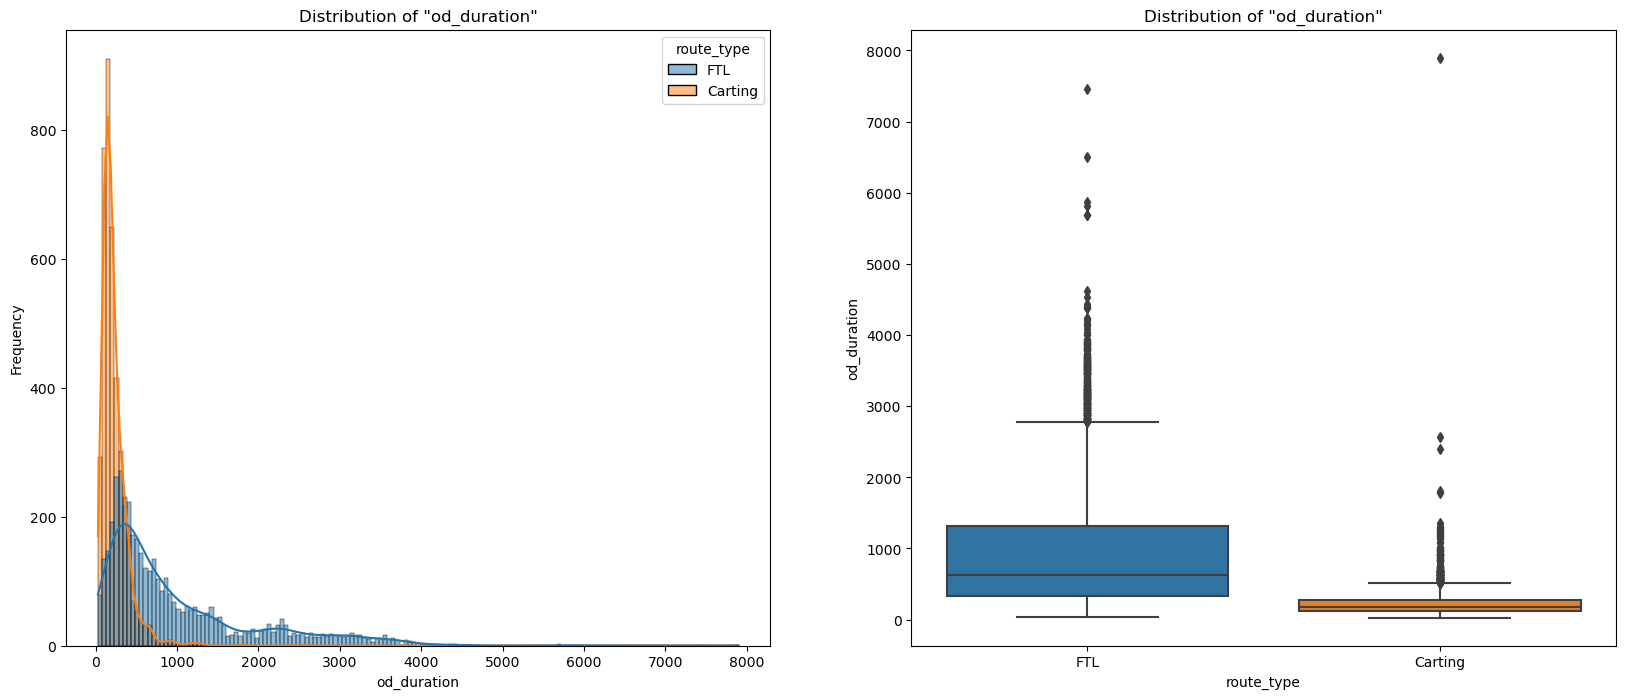

In [101]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'od_duration', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "od_duration"')

plt.subplot(122)
sns.boxplot(data = final_data, y = 'od_duration', x = 'route_type')
plt.ylabel('od_duration')
plt.title('Distribution of "od_duration"')
plt.show()

### `2. actual_distance_to_destination`

### `Observations:`
#### `- 1.` The distribution of "actual_distance_to_destination" is extremely right skewed with mean distance = 163 and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 21-120

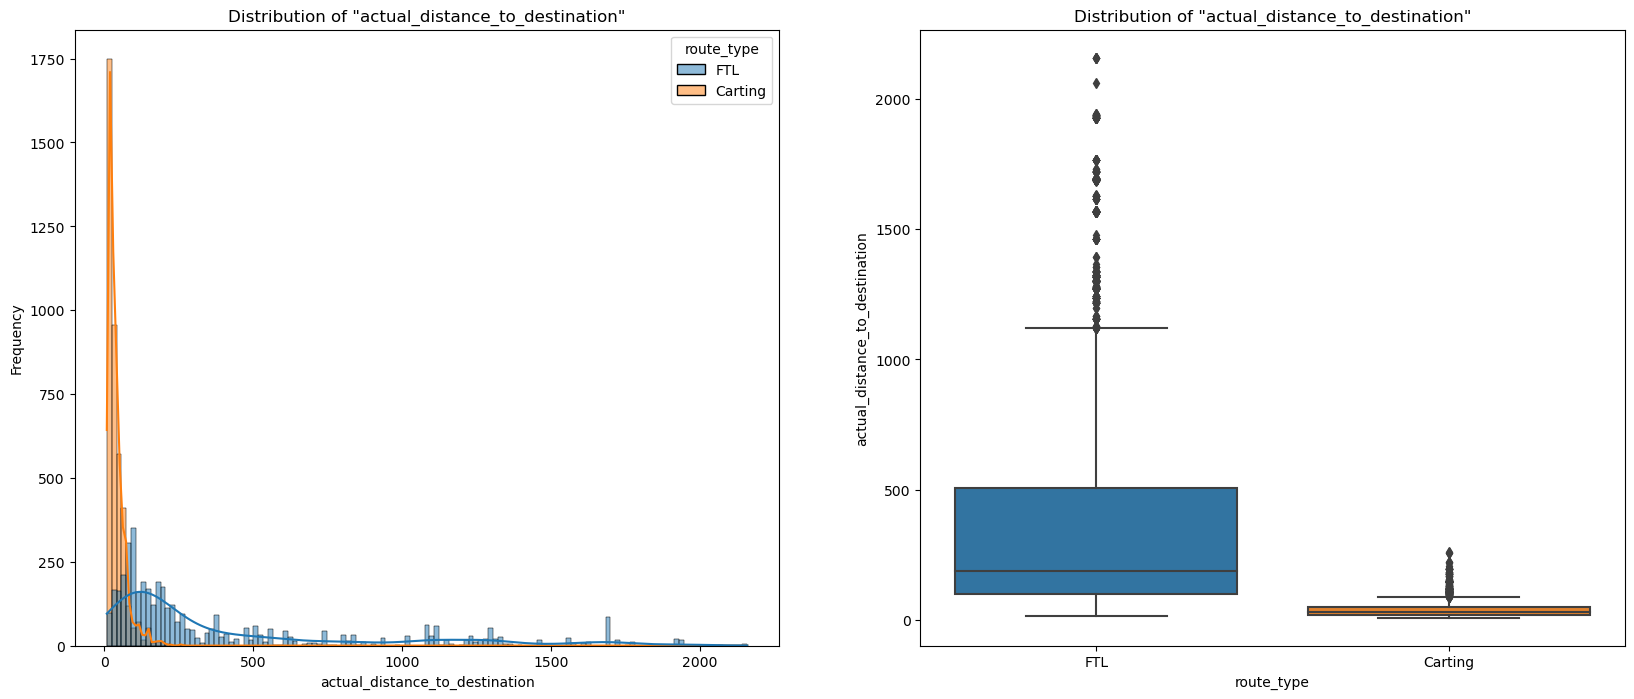

In [102]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'actual_distance_to_destination', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "actual_distance_to_destination"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'actual_distance_to_destination')
plt.ylabel('actual_distance_to_destination')
plt.title('Distribution of "actual_distance_to_destination"')
plt.show()

### `3. start_scan_to_end_scan`

### `Observations:`
#### `- 1.` The distribution of "start_scan_to_end_scan" is extremely right skewed with mean time = 477 minutes and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 132-455 minutes

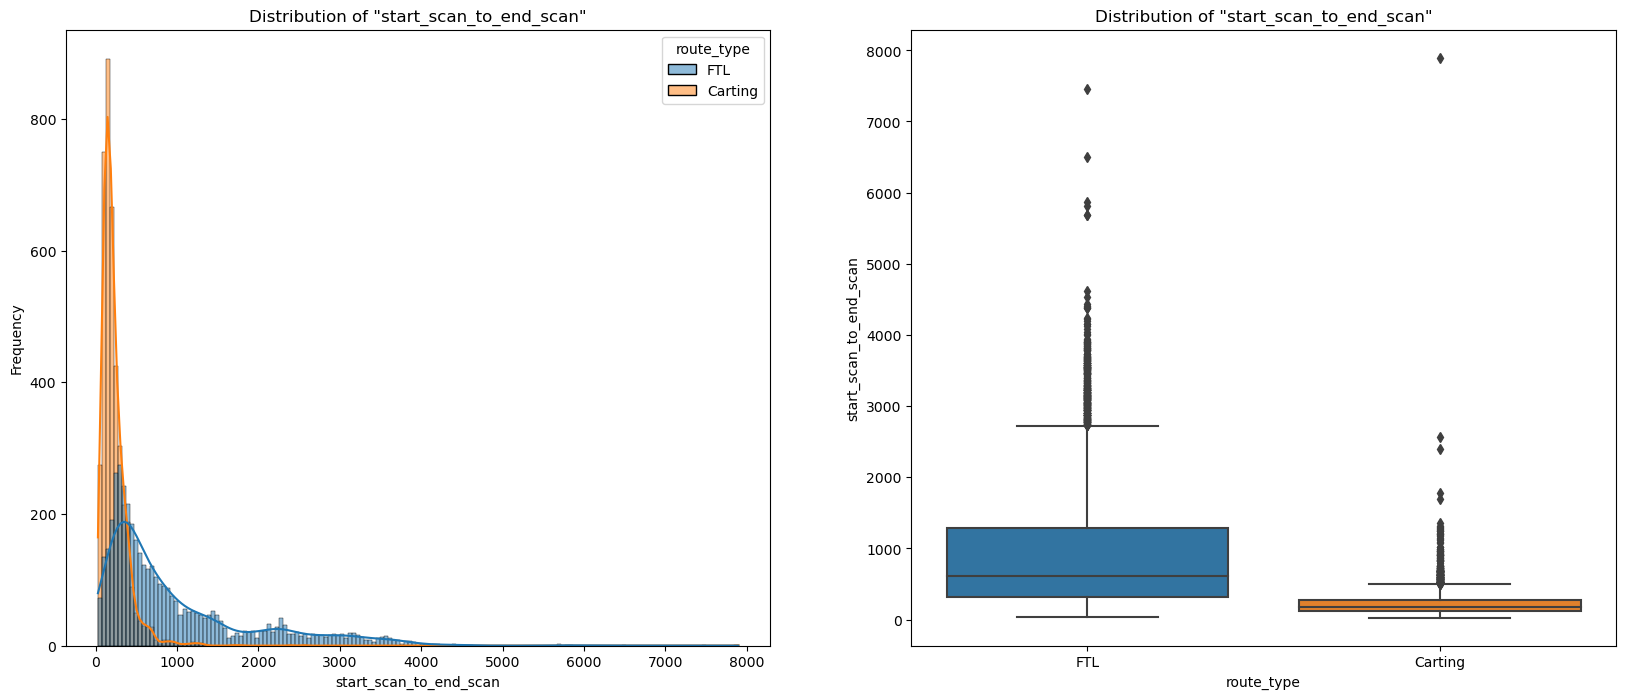

In [103]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'start_scan_to_end_scan', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "start_scan_to_end_scan"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'start_scan_to_end_scan')
plt.ylabel('start_scan_to_end_scan')
plt.title('Distribution of "start_scan_to_end_scan"')
plt.show()

### `4. osrm_distance`

### `Observations:`
#### `- 1.` The distribution of "osrm_distance" is extremely right skewed with mean distance = 202 and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 28-153

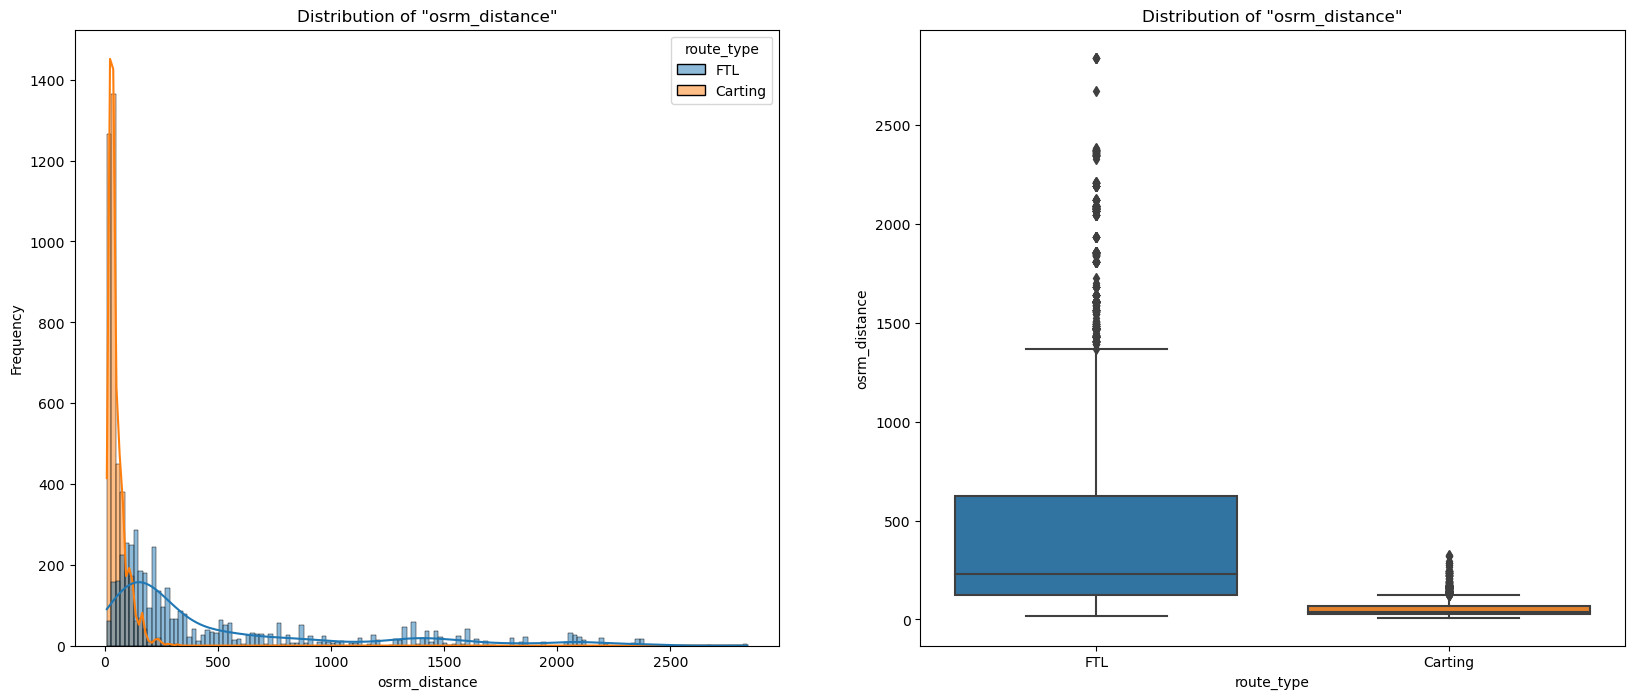

In [104]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'osrm_distance', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "osrm_distance"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'osrm_distance')
plt.ylabel('osrm_distance')
plt.title('Distribution of "osrm_distance"')
plt.show()

### `5. actual_time`

### `Observations:`
#### `- 1.` The distribution of "actual_time" is extremely right skewed with mean time = 334 minutes and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 59-282 minutes

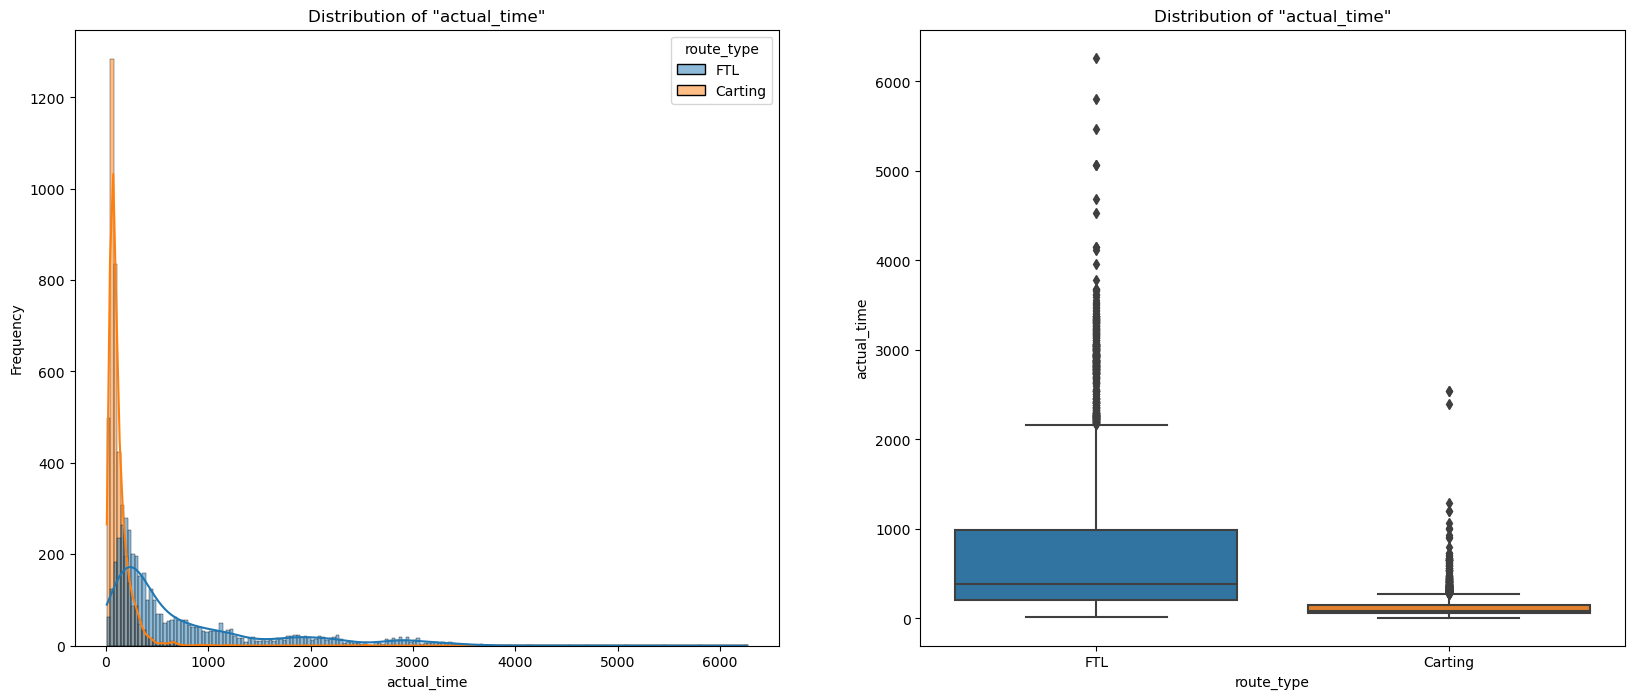

In [105]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'actual_time', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "actual_time"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'actual_time')
plt.ylabel('actual_time')
plt.title('Distribution of "actual_time"')
plt.show()

### `6. osrm_time`

### `Observations:`
#### `- 1.` The distribution of "osrm_time" is extremely right skewed with mean time = 158 minutes and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 26-126 minutes

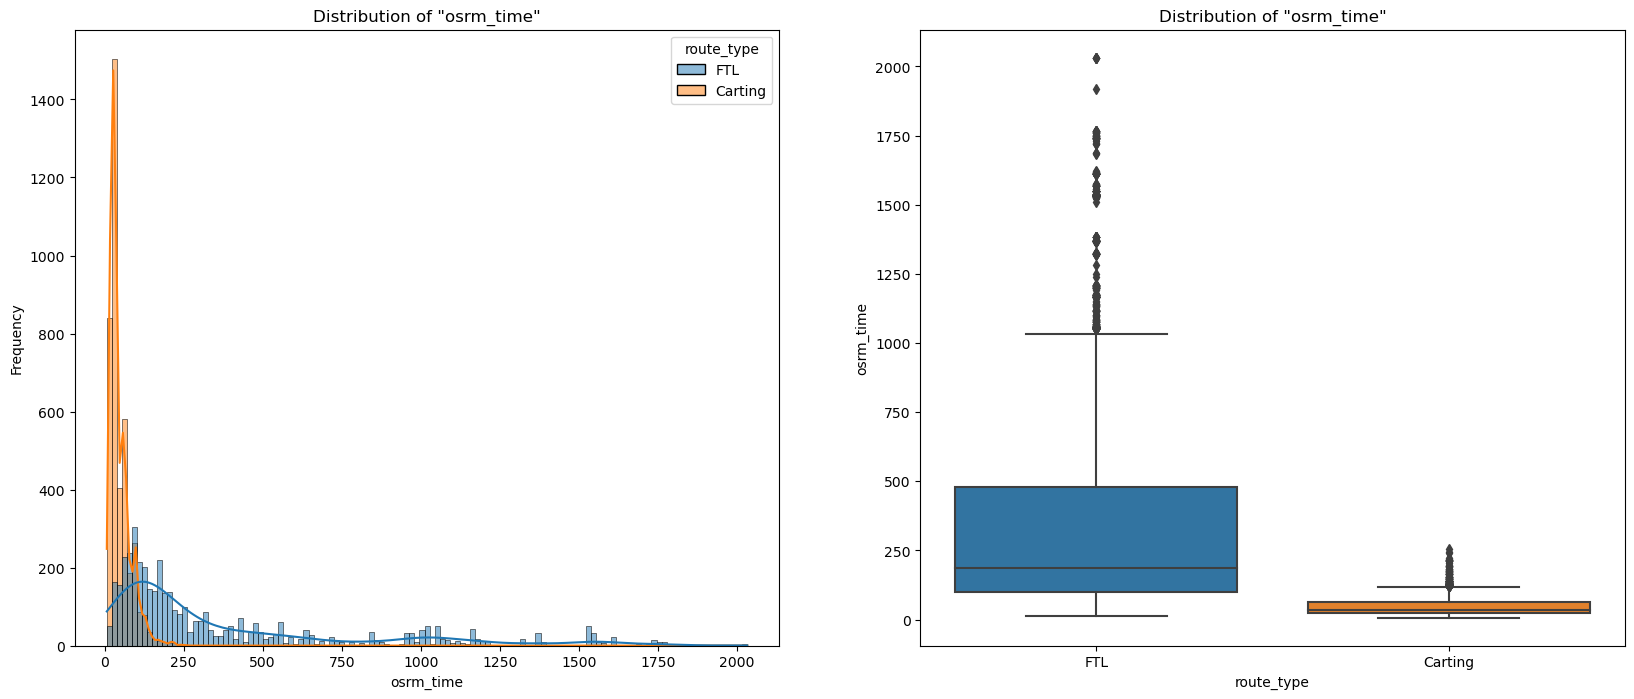

In [106]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'osrm_time', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "osrm_time"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'osrm_time')
plt.ylabel('osrm_time')
plt.title('Distribution of "osrm_time"')
plt.show()

### `7. segment_actual_time_total`

### `Observations:`
#### `- 1.` The distribution of "segment_actual_time_total" is extremely right skewed with mean time = 331 minutes and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 58-280 minutes

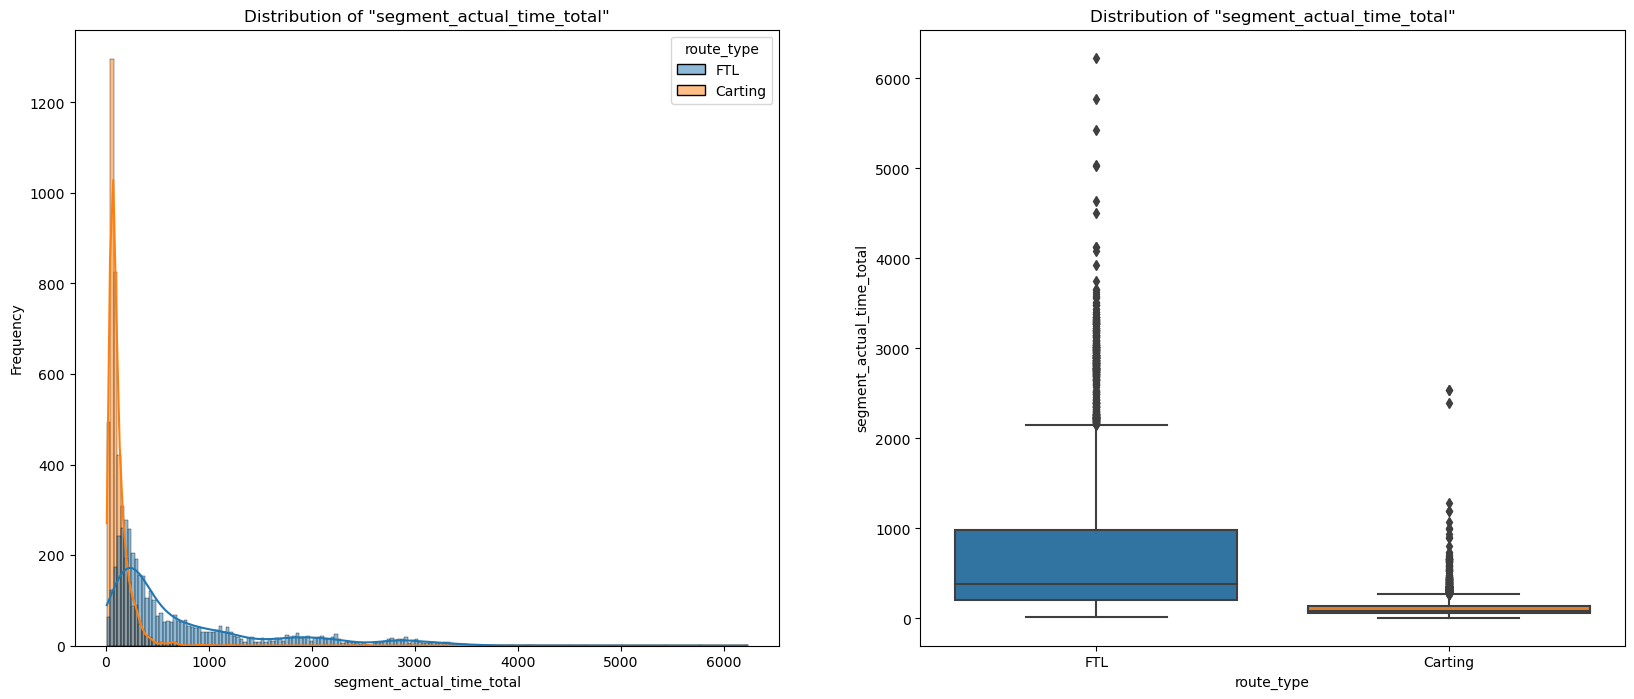

In [107]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'segment_actual_time_total', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "segment_actual_time_total"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'segment_actual_time_total')
plt.ylabel('segment_actual_time_total')
plt.title('Distribution of "segment_actual_time_total"')
plt.show()

### `8. segment_osrm_time_total`

### `Observations:`
#### `- 1.` The distribution of "segment_osrm_time_total" is extremely right skewed with mean time = 178 minutes and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 27-149 minutes

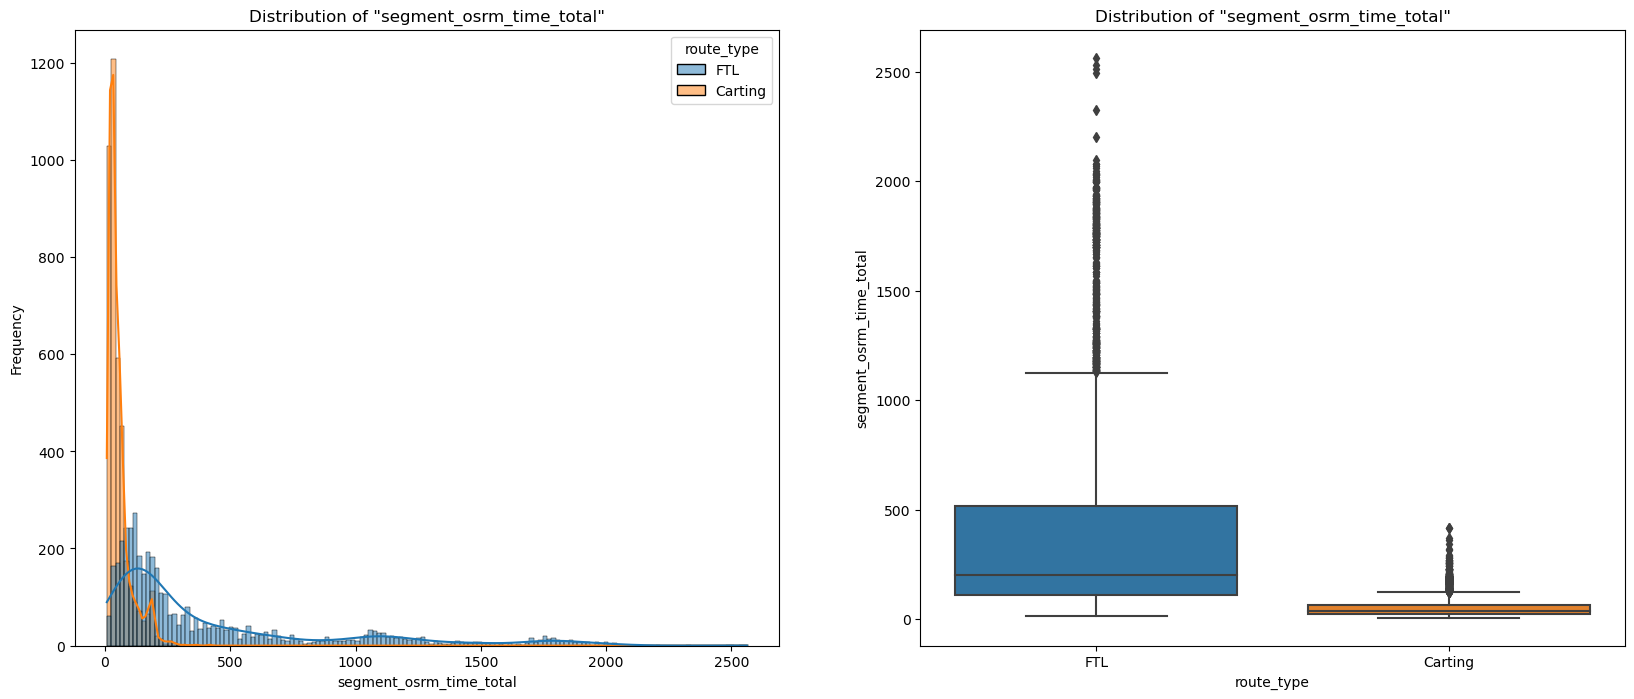

In [108]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'segment_osrm_time_total', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "segment_osrm_time_total"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'segment_osrm_time_total')
plt.ylabel('segment_osrm_time_total')
plt.title('Distribution of "segment_osrm_time_total"')
plt.show()

### `9. segment_osrm_distance_total`

### `Observations:`
#### `- 1.` The distribution of "segment_osrm_distance_total" is extremely right skewed with mean distance = 221 and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 29-162

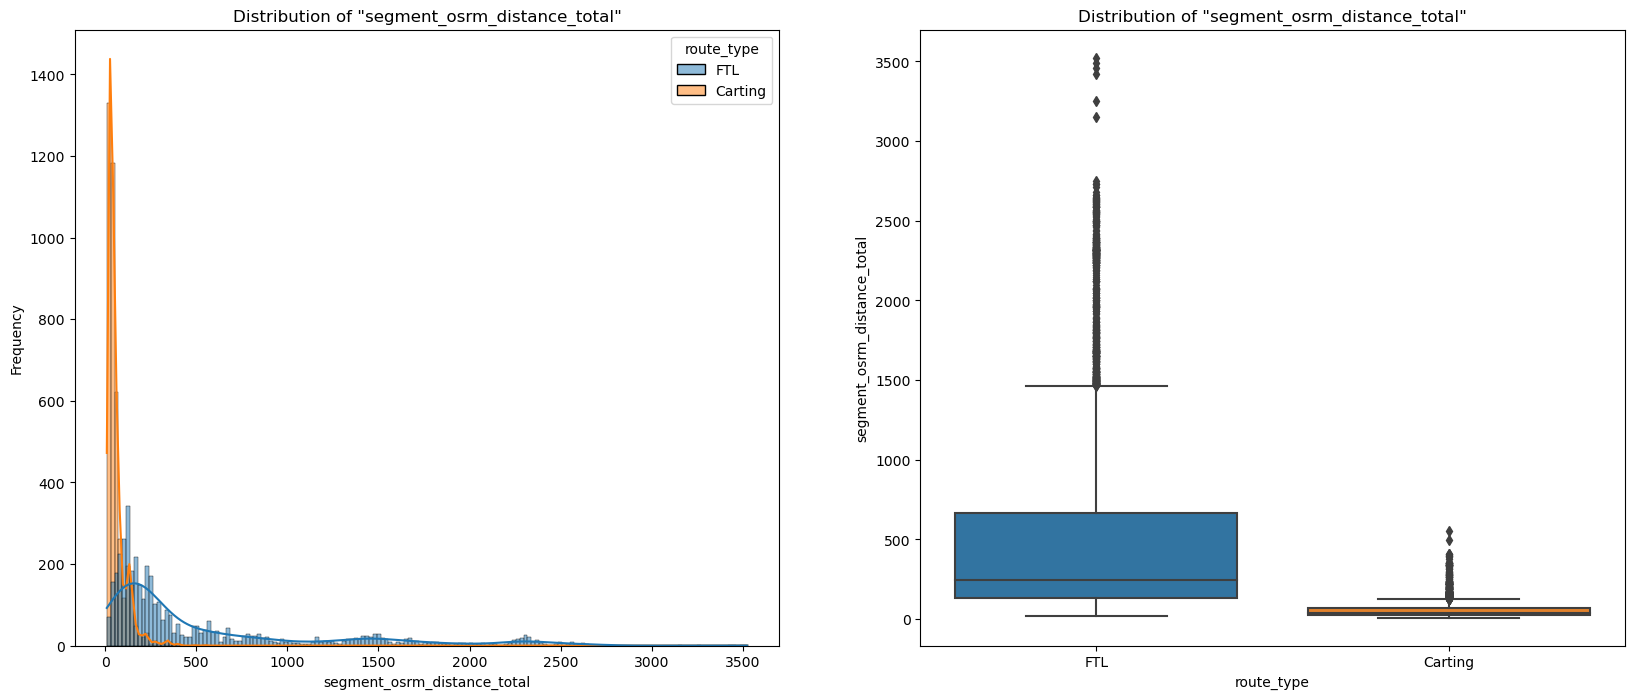

In [109]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'segment_osrm_distance_total', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "segment_osrm_distance_total"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'segment_osrm_distance_total')
plt.ylabel('segment_osrm_distance_total')
plt.title('Distribution of "segment_osrm_distance_total"')
plt.show()

### `10. segments (Number of segments it took from source to destination`

### `Observations:`
#### `- 1.` The distribution of "segments" is extremely right skewed with mean = 7.89 and outliers on the right side.
#### `- 2.` 50 % of the values are in the range of 2-6

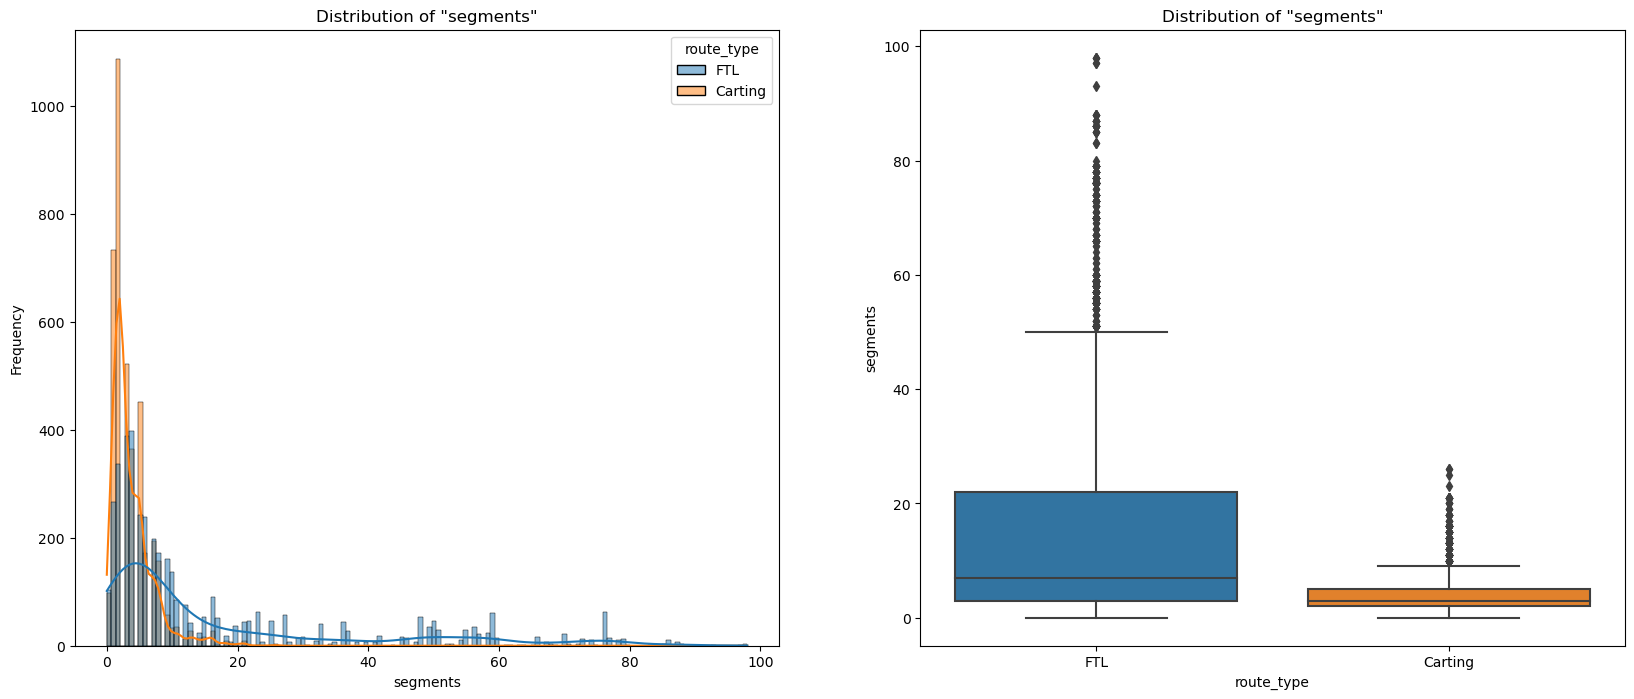

In [110]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.histplot(data = final_data, x = 'segments', hue = 'route_type', kde = True)
plt.ylabel('Frequency')
plt.title('Distribution of "segments"')

plt.subplot(122)
sns.boxplot(data = final_data, x = 'route_type', y = 'segments')
plt.ylabel('segments')
plt.title('Distribution of "segments"')
plt.show()

## `Bivariate Analysis`

### `1. "route_type" vs "od_duration": Long duration trips tend to choose "FTL" over "Carting"`

### `Observations:`
#### `- 1.` From visual analysis, it is observed that the "od_duration" is higher in case of "FTL" route type.
#### `- 2.` Mean "od_duration" across "FTL" route type = 969 and mean "od_duration" across "Carting" route type = 202

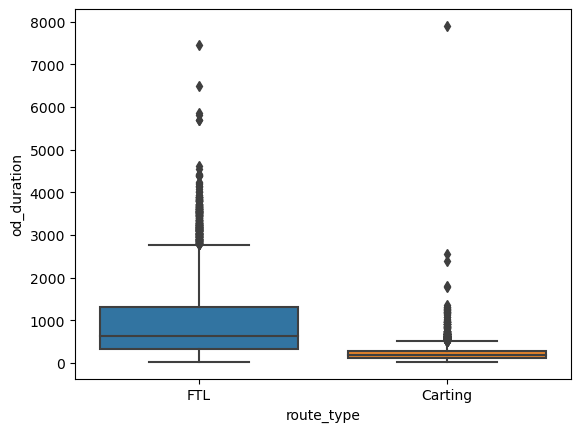

In [111]:
sns.boxplot(data = final_data, x = 'route_type', y = 'od_duration')
plt.show()

### `But is this difference statistically significant or just by chance ?`

In [112]:
od_duration_ftl = final_data.loc[final_data['route_type'] == 'FTL', 'od_duration']
od_duration_carting = final_data.loc[final_data['route_type'] == 'Carting', 'od_duration']

In [113]:
t_stat, p_val = ttest_ind(od_duration_ftl, od_duration_carting, alternative = "greater")

if p_val < 0.05:
    print('Longer duration trips tend to choose "FLT" instead of "carting"')
else:
    print('There is no statistically significant effect of trip duration on "route_type" chosen')

Longer duration trips tend to choose "FLT" instead of "carting"


### `2. "route_type" vs "actual_distance_to_destination": Long distance trips tend to choose "FTL" over "Carting"`

### `Observations:`
#### `- 1.` From visual analysis, it is observed that the "actual_distance_to_destination" is higher in case of "FTL" route type.
#### `- 2.` Mean "actual_distance_to_destination" across "FTL" route type = 390 and mean "od_duration" across "Carting" route type = 32

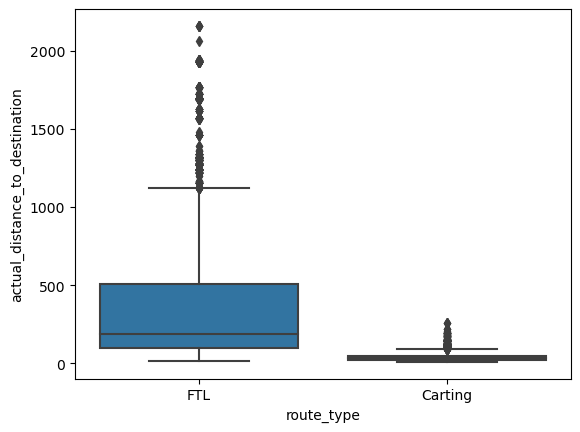

In [114]:
sns.boxplot(data = final_data, x = 'route_type', y = 'actual_distance_to_destination')
plt.show()

### `But is this difference statistically significant or just by chance ?`

In [115]:
actual_distance_to_destination_ftl = final_data.loc[final_data['route_type'] == 'FTL', 'actual_distance_to_destination']
actual_distance_to_destination_carting = final_data.loc[final_data['route_type'] == 'Carting', 'actual_distance_to_destination']

In [116]:
t_stat, p_val = ttest_ind(actual_distance_to_destination_ftl, actual_distance_to_destination_carting, alternative = "greater")

if p_val < 0.05:
    print('Long distance trips tend to choose "FLT" instead of "carting"')
else:
    print('There is no statistically significant effect of trip "actual_distance_to_destination" on "route_type" chosen')

Long distance trips tend to choose "FLT" instead of "carting"


## `Outlier Treatment - IQR Method`

### - Some routes may be short distanced but some can be very long.
### - For a particular source and destination, FTL route type may be short in comparison to Carting because in case of "FTL" route type, it doesn't have to take multiple segments and divert the route.
### - Calling them outliers just like that would be a mistake
### - We can group the data on "source_city", "destination_city" and "route_type" and then detect the outliers in case of a particular "source", "destination" and "route_type".

### - For treating outliers, we can use IQR method i.e. any value above the upper limit (75th Percentile + 1.5 * IQR) or below the lower limit (25th Percentile - 1.5 * IQR) will be clipped at the limits.

In [117]:
def treat_outliers(grp):
    numeric_cols = ['od_duration','actual_distance_to_destination',
                    'start_scan_to_end_scan', 'osrm_distance',
                    'actual_time', 'osrm_time', 'segment_actual_time_total',
                    'segment_osrm_time_total', 'segment_osrm_distance_total',
                    'segments']
    
    for col in numeric_cols:
        P25, P75 = np.percentile(grp[col], [25, 75])
        upper_limit = P75 + 1.5 * (P75 - P25)
        lower_limit = P25 - 1.5 * (P75 - P25)
        grp.loc[grp[col] < lower_limit, col] = lower_limit
        grp.loc[grp[col] > upper_limit, col] = upper_limit
    
    return grp

In [118]:
final_data = final_data.groupby(['source_city', 'destination_city', 'route_type']).apply(treat_outliers).reset_index(drop = True)

## `One-hot Encoding of Categorical Variables - "route_type"`
### - One-hot encoding is suitable when we have fewer categories and we want to convert a categorical column into numeric one.

In [119]:
enc = OneHotEncoder()

In [120]:
encoded_route_type = pd.DataFrame(enc.fit_transform(final_data['route_type'].to_frame()).toarray()).rename(columns = {0: "Carting", 1: "FTL"})
encoded_route_type

,Carting,FTL
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
8256,1.0,0.0
8257,1.0,0.0
8258,1.0,0.0
8259,1.0,0.0


In [121]:
final_data = final_data.join(encoded_route_type)

In [122]:
final_data.head()

,trip_creation_year,trip_creation_month,trip_creation_day,trip_uuid,source_city,source_place,source_code,source_state,destination_city,destination_place,...,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments,Carting,FTL
0,2018,9,12,trip-153671041653548748,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,...,2259.0,991.3523,1562.0,743.0,1548.0,1008.0,1320.4733,37.0,0.0,1.0
1,2018,9,12,trip-153671042288605164,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,...,180.0,85.1110,143.0,68.0,141.0,65.0,84.1894,7.0,1.0,0.0
2,2018,9,12,trip-153671043369099517,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,...,3933.0,2372.0852,3347.0,1741.0,3308.0,1941.0,2545.2678,87.0,0.0,1.0
3,2018,9,12,trip-153671090980523004,Pune,North,D3,Maharashtra,PNQ,Rahatani,...,72.0,18.5886,60.0,17.0,60.0,17.0,18.5887,1.0,1.0,0.0
4,2018,9,12,trip-153671121411074590,Hyderabad,Shamshbd,H,Telangana,Bengaluru,Nelmngla,...,995.0,542.0812,809.0,428.0,802.0,492.0,623.3792,21.0,0.0,1.0


## `Hypothesis Testing`

### `1. "od_duration" (difference between "od_start_time" and "od_end_time") and "start_scan_to_end_scan"`

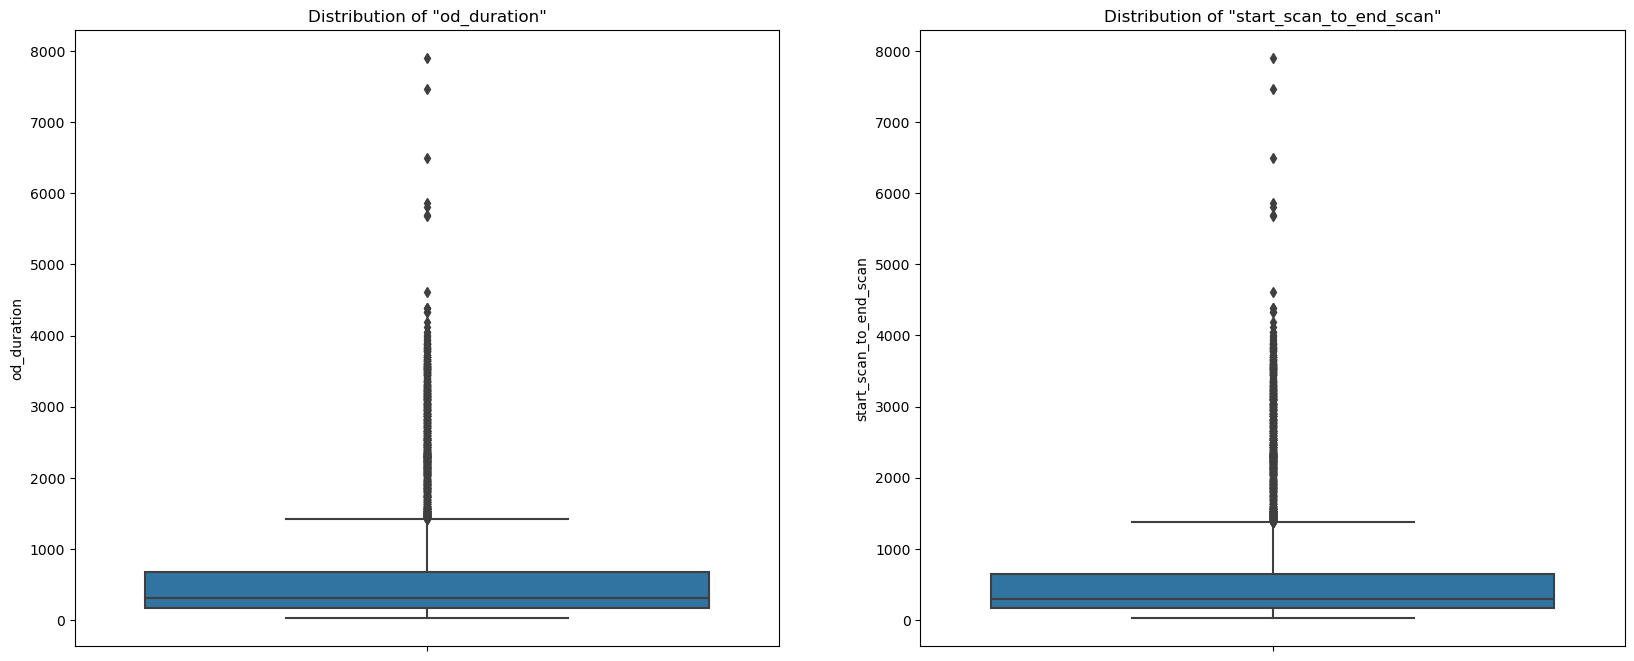

In [123]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.boxplot(data = final_data, y = "od_duration")
plt.title('Distribution of "od_duration"')

plt.subplot(122)
sns.boxplot(data = final_data, y = "start_scan_to_end_scan")
plt.title('Distribution of "start_scan_to_end_scan"')

plt.show()

In [124]:
od_duration = final_data['od_duration']
start_scan_to_end_scan = final_data['start_scan_to_end_scan']

print(f'The mean value of "od_duration" i.e. difference between "od_start_time" and "od_end_time" is {round(od_duration.mean())} minutes')
print(f'The mean value of "start_scan_to_end_scan" is {round(start_scan_to_end_scan.mean())} minutes')

The mean value of "od_duration" i.e. difference between "od_start_time" and "od_end_time" is 608 minutes
The mean value of "start_scan_to_end_scan" is 601 minutes


### `From the visual analysis, it seems that "od_duration" and "start_scan_to_end_scan" are similar`
### `But is this small difference statistically insignificant ?`

### `2 sample t- test`

In [125]:
t_stat, p_value = ttest_ind(od_duration, start_scan_to_end_scan, alternative = "greater")

if p_value < 0.05:
    print('The difference between "od_duration" and "start_scan_to_end_scan" is statistically significant i.e. "od_duration" is higher than "start_scan_to_end_scan"')
else:
    print('"od_duration" and "start_scan_to_end_scan" are similar across the trips')

"od_duration" and "start_scan_to_end_scan" are similar across the trips


### `Correlation between "od_duration" and "start_scan_to_end_scan"`

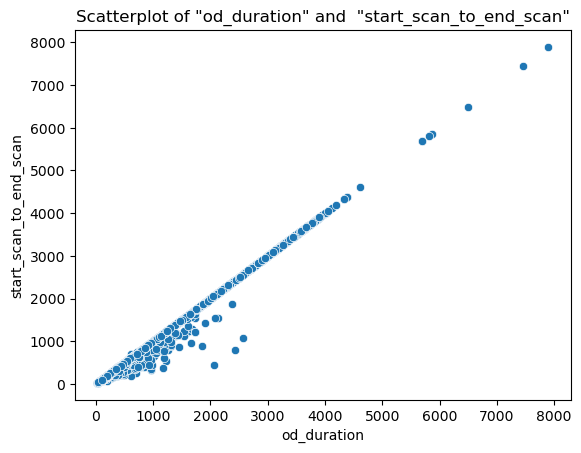

In [126]:
r = pearsonr(od_duration, start_scan_to_end_scan)
sns.scatterplot(x = od_duration, y = start_scan_to_end_scan)
plt.title('Scatterplot of "od_duration" and  "start_scan_to_end_scan"')
plt.show()

### `"od_duration" and "start_scan_to_end_scan" have a strong positive linear correlation with Pearson's coefficient = 0.998`
### As `"od_duration"` increases, `"start_scan_to_end_scan"` also increases.

### `2. "actual_time_aggregated_value" and "osrm_time_aggregated_value"`

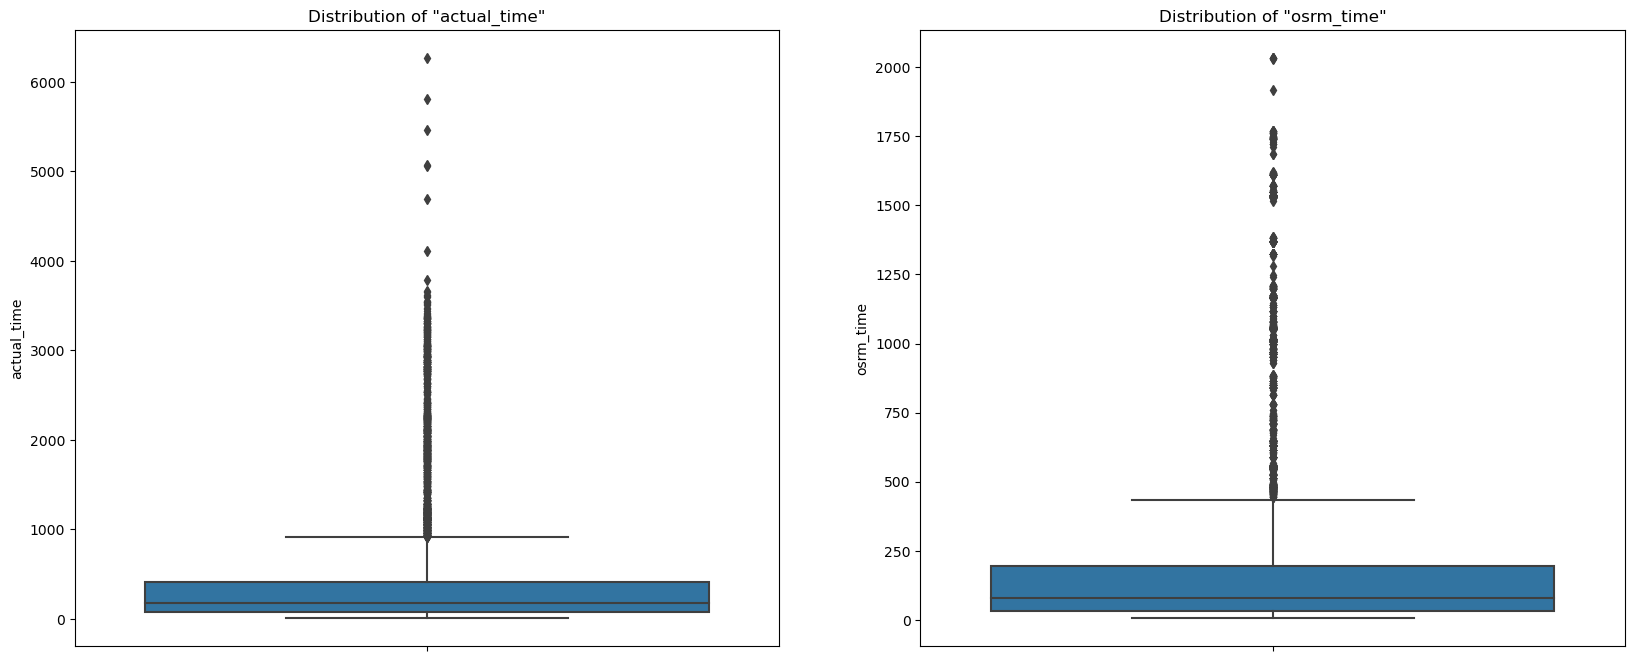

In [127]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.boxplot(data = final_data, y = "actual_time")
plt.title('Distribution of "actual_time"')

plt.subplot(122)
sns.boxplot(data = final_data, y = "osrm_time")
plt.title('Distribution of "osrm_time"')

plt.show()

In [128]:
actual_time = final_data['actual_time']
osrm_time = final_data['osrm_time']

print(f'The mean value of "actual_time_aggregated_value" is {round(actual_time.mean())} minutes')
print(f'The mean value of "osrm_time_aggregated_value" is {round(osrm_time.mean())} minutes')

The mean value of "actual_time_aggregated_value" is 439 minutes
The mean value of "osrm_time_aggregated_value" is 212 minutes


### `From the visual analysis, it seems that "actual_time_aggregated_value" is greater than  "osrm_time_aggregated_value"`
### `But is this difference statistically significant or just by chance ?`

### `2 sample t- test`

In [129]:
t_stat, p_value = ttest_ind(actual_time, osrm_time, alternative = "greater")

if p_value < 0.05:
    print('The difference between "actual_time_aggregated_value" and "osrm_time_aggregated_value" is statistically significant i.e. "actual_time_aggregated_value" is higher than "osrm_time_aggregated_value"')
else:
    print('"actual_time_aggregated_value" and "osrm_time_aggregated_value" are similar across the trips')

The difference between "actual_time_aggregated_value" and "osrm_time_aggregated_value" is statistically significant i.e. "actual_time_aggregated_value" is higher than "osrm_time_aggregated_value"


### `Correlation between "actual_time_aggregated_value" and "osrm_time_aggregated_value"`

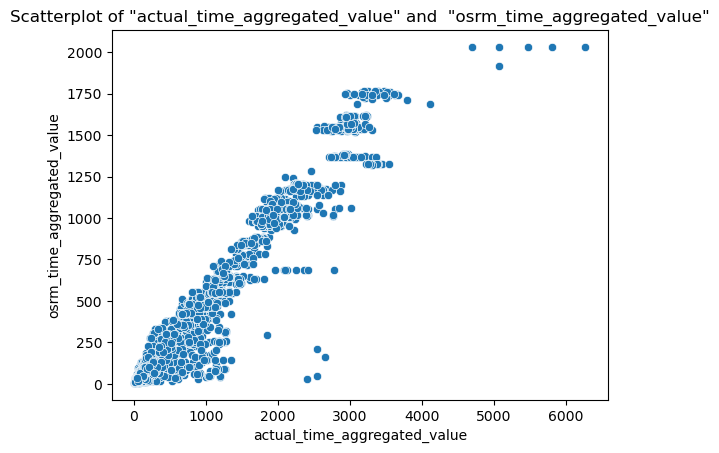

In [130]:
r = pearsonr(actual_time, osrm_time)
sns.scatterplot(x = actual_time, y = osrm_time)
plt.title('Scatterplot of "actual_time_aggregated_value" and  "osrm_time_aggregated_value"')
plt.xlabel('actual_time_aggregated_value')
plt.ylabel('osrm_time_aggregated_value')
plt.show()

### `"actual_time_aggregated_value" and "osrm_time_aggregated_value" have a strong positive linear correlation with Pearson's coefficient = 0.982`
### As `"actual_time_aggregated_value"` increases, `"osrm_time_aggregated_value"` also increases.

### `3. "actual_time_aggregated_value" and "segment_actual_time_aggregated_value"`

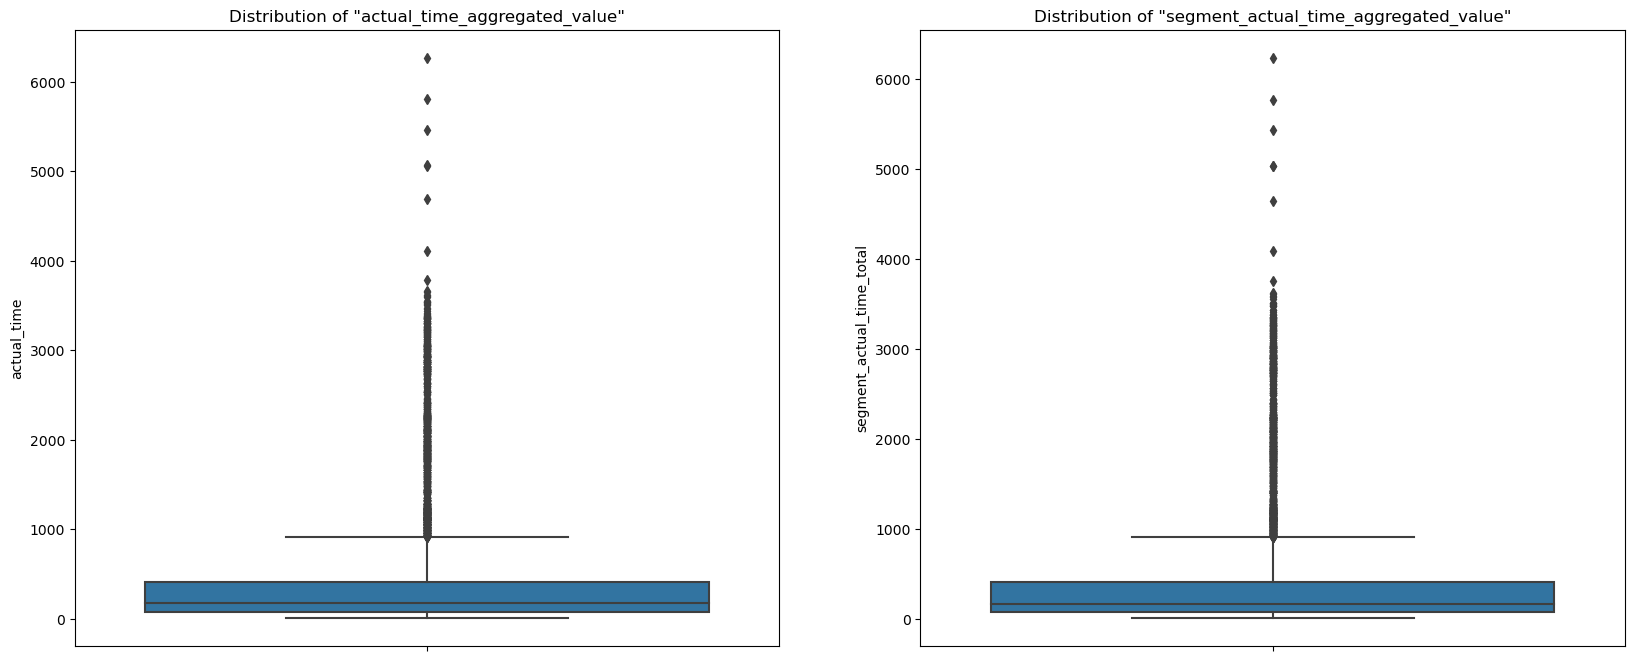

In [131]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.boxplot(data = final_data, y = "actual_time")
plt.title('Distribution of "actual_time_aggregated_value"')

plt.subplot(122)
sns.boxplot(data = final_data, y = "segment_actual_time_total")
plt.title('Distribution of "segment_actual_time_aggregated_value"')

plt.show()

In [132]:
actual_time = final_data['actual_time']
segment_actual_time_total = final_data['segment_actual_time_total']

print(f'The mean value of "actual_time_aggregated_value" is {round(actual_time.mean())} minutes')
print(f'The mean value of "segment_actual_time_aggregated_value" is {round(segment_actual_time_total.mean())} minutes')

The mean value of "actual_time_aggregated_value" is 439 minutes
The mean value of "segment_actual_time_aggregated_value" is 435 minutes


### `From the visual analysis, it seems that "actual_time_aggregated_value" and "segment_actual_time_aggregated_value" are similar across the trips`
### `But is this small difference statistically insignificant ?`

### `2 sample t- test`

In [133]:
t_stat, p_value = ttest_ind(actual_time, segment_actual_time_total, alternative = "greater")

if p_value < 0.05:
    print('The difference between "actual_time_aggregated_value" and "segment_actual_time_aggregated_value" is statistically significant i.e. "actual_time_aggregated_value" is higher than "segment_actual_time_aggregated_value"')
else:
    print('"actual_time_aggregated_value" and "segment_actual_time_aggregated_value" are similar across the trips')

"actual_time_aggregated_value" and "segment_actual_time_aggregated_value" are similar across the trips


### `Correlation between "actual_time_aggregated_value" and "segment_actual_time_aggregated_value"`

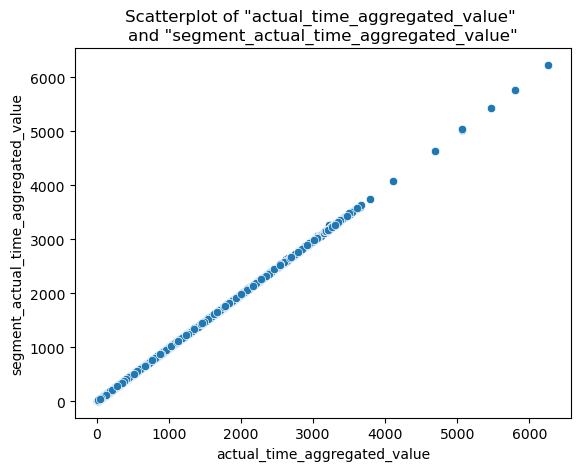

In [134]:
r = pearsonr(actual_time, segment_actual_time_total)
sns.scatterplot(x = actual_time, y = segment_actual_time_total)
plt.xlabel('actual_time_aggregated_value')
plt.ylabel('segment_actual_time_aggregated_value')
plt.title('Scatterplot of "actual_time_aggregated_value" \nand "segment_actual_time_aggregated_value"')
plt.show()

### `"actual_time_aggregated_value" and "segment_actual_time_aggregated_value" have a strong positive linear correlation with Pearson's coefficient = 0.999`
### As `"actual_time_aggregated_value"` increases, `"segment_actual_time_aggregated_value"` also increases.

### `4. "osrm_distance_aggregated_value" and "segment_osrm_distance_aggregated_value"`

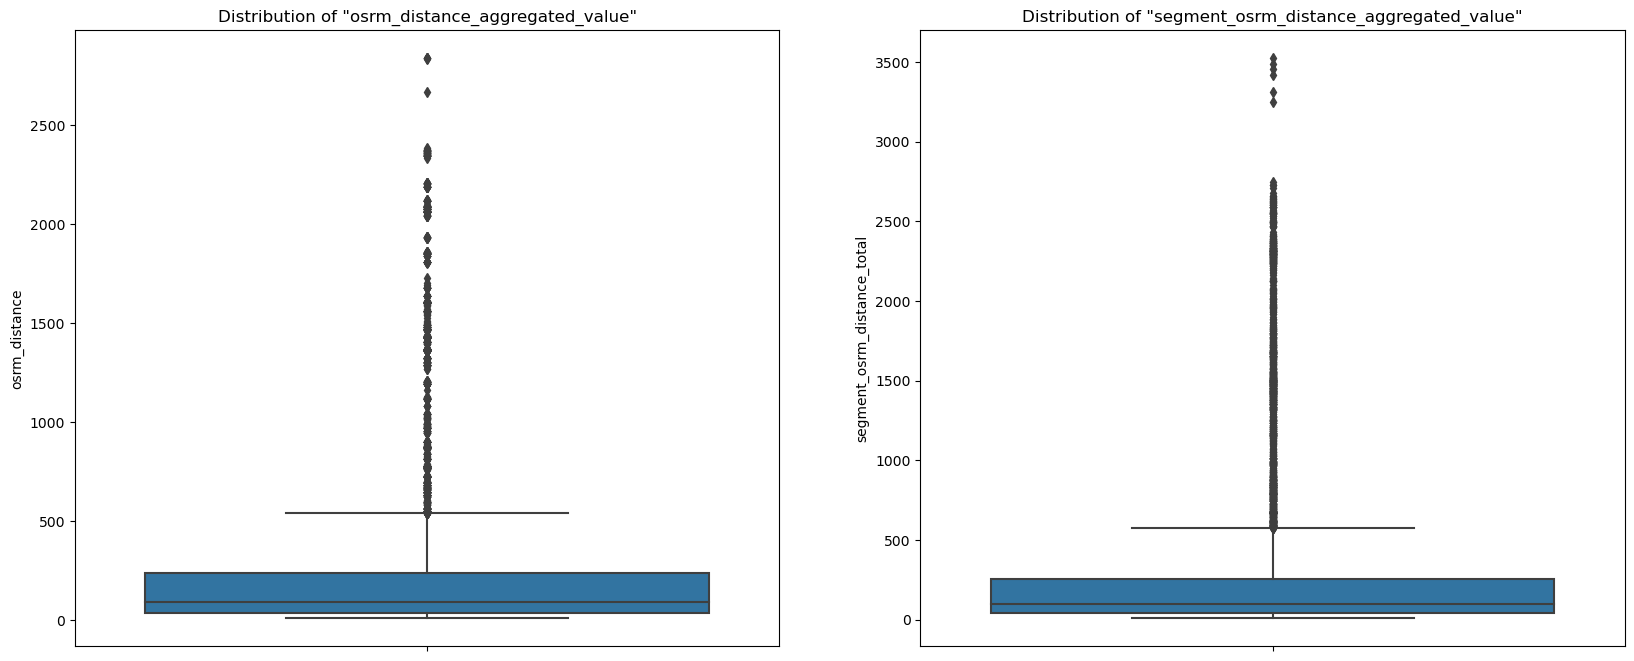

In [135]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.boxplot(data = final_data, y = "osrm_distance")
plt.title('Distribution of "osrm_distance_aggregated_value"')

plt.subplot(122)
sns.boxplot(data = final_data, y = "segment_osrm_distance_total")
plt.title('Distribution of "segment_osrm_distance_aggregated_value"')

plt.show()

In [136]:
osrm_distance_aggregated_value = final_data['osrm_distance']
segment_osrm_distance_aggregated_value = final_data['segment_osrm_distance_total']

print(f'The mean value of "osrm_distance_aggregated_value" is {round(osrm_distance_aggregated_value.mean())}')
print(f'The mean value of "segment_osrm_distance_aggregated_value" is {round(segment_osrm_distance_aggregated_value.mean())}')

The mean value of "osrm_distance_aggregated_value" is 275
The mean value of "segment_osrm_distance_aggregated_value" is 301


### `From the visual analysis, it seems that "osrm_distance_aggregated_value" is lower than "segment_osrm_distance_aggregated_value" across the trips`
### `But is this difference statistically significant ?`

### `2 sample t- test`

In [137]:
t_stat, p_value = ttest_ind(segment_osrm_distance_aggregated_value, osrm_distance_aggregated_value, alternative = "greater")

if p_value < 0.05:
    print('The difference between "segment_osrm_distance_aggregated_value" and "osrm_distance_aggregated_value" is statistically significant i.e. "segment_osrm_distance_aggregated_value" is higher than "osrm_distance_aggregated_value"')
else:
    print('"osrm_distance_aggregated_value" and "segment_osrm_distance_aggregated_value" are similar across the trips')

The difference between "segment_osrm_distance_aggregated_value" and "osrm_distance_aggregated_value" is statistically significant i.e. "segment_osrm_distance_aggregated_value" is higher than "osrm_distance_aggregated_value"


### `Correlation between "osrm_distance_aggregated_value" and "segment_osrm_distance_aggregated_value"`

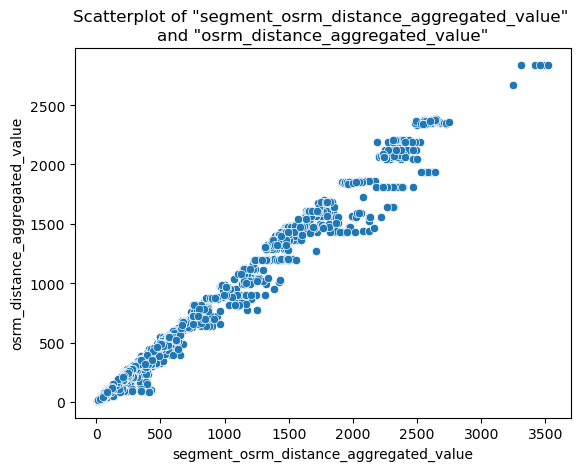

In [138]:
r = pearsonr(segment_osrm_distance_aggregated_value, osrm_distance_aggregated_value)
sns.scatterplot(x = segment_osrm_distance_aggregated_value, y = osrm_distance_aggregated_value)
plt.xlabel('segment_osrm_distance_aggregated_value')
plt.ylabel('osrm_distance_aggregated_value')
plt.title('Scatterplot of "segment_osrm_distance_aggregated_value" \nand "osrm_distance_aggregated_value"')
plt.show()

### `"segment_osrm_distance_aggregated_value" and "osrm_distance_aggregated_value" have a strong positive linear correlation with Pearson's correlation coefficient = 0.995`
### As `"segment_osrm_distance_aggregated_value"` increases, `"osrm_distance_aggregated_value"` also increases.

### `5. "osrm_time_aggregated_value" and "segment_osrm_time_aggregated_value"`

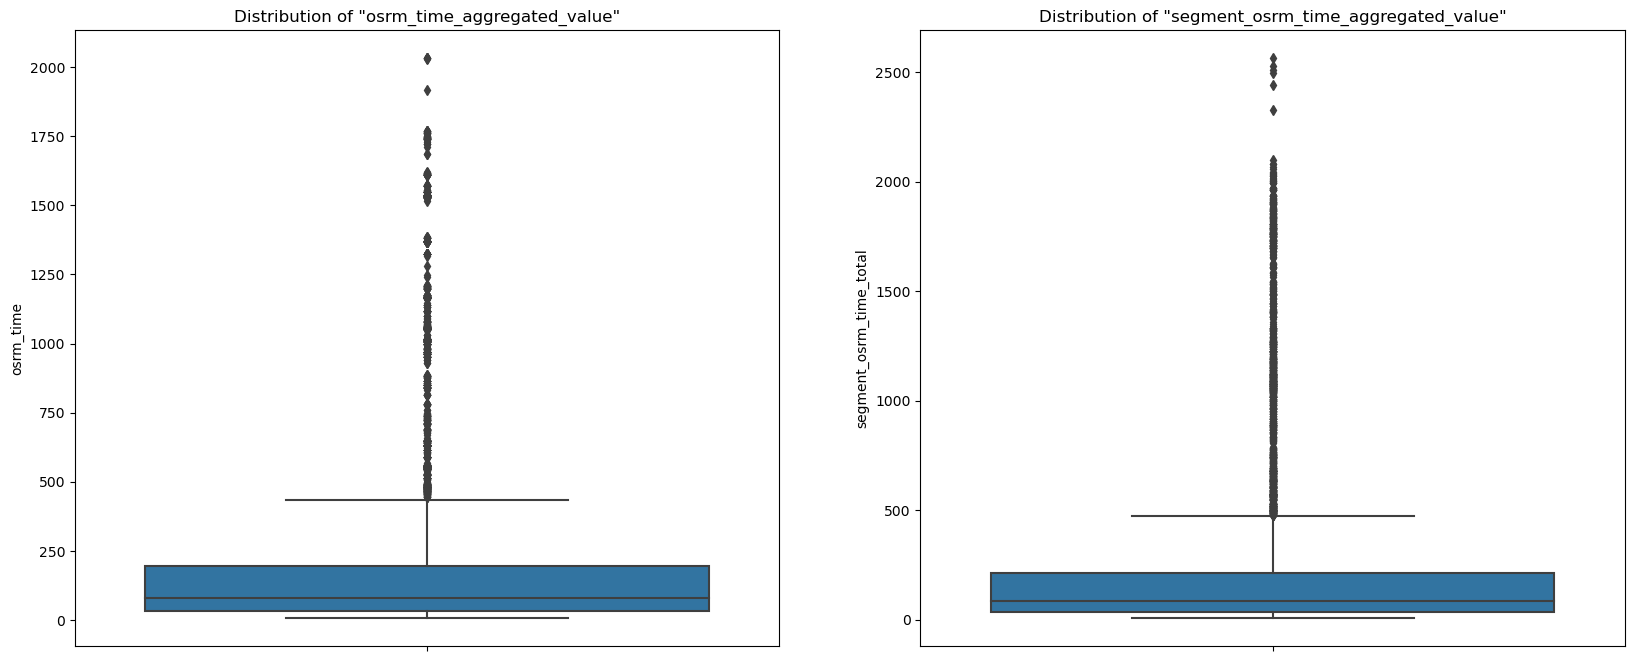

In [139]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.boxplot(data = final_data, y = "osrm_time")
plt.title('Distribution of "osrm_time_aggregated_value"')

plt.subplot(122)
sns.boxplot(data = final_data, y = "segment_osrm_time_total")
plt.title('Distribution of "segment_osrm_time_aggregated_value"')

plt.show()

In [140]:
osrm_time_aggregated_value = final_data['osrm_time']
segment_osrm_time_aggregated_value = final_data['segment_osrm_time_total']

print(f'The mean value of "osrm_time_aggregated_value" is {round(osrm_time_aggregated_value.mean())} minutes')
print(f'The mean value of "segment_osrm_time_aggregated_value" is {round(segment_osrm_time_aggregated_value.mean())} minutes')

The mean value of "osrm_time_aggregated_value" is 212 minutes
The mean value of "segment_osrm_time_aggregated_value" is 239 minutes


### `From the visual analysis, it seems that "osrm_time_aggregated_value" is lower than "segment_osrm_time_aggregated_value" across the trips`
### `But is this difference statistically significant ?`

### `2 sample t- test`

In [141]:
t_stat, p_value = ttest_ind(segment_osrm_time_aggregated_value, osrm_time_aggregated_value, alternative = "greater")

if p_value < 0.05:
    print('The difference between "segment_osrm_time_aggregated_value" and "osrm_time_aggregated_value" is statistically significant i.e. "segment_osrm_time_aggregated_value" is higher than "osrm_time_aggregated_value"')
else:
    print('"osrm_time_aggregated_value" and "segment_osrm_time_aggregated_value" are similar across the trips')

The difference between "segment_osrm_time_aggregated_value" and "osrm_time_aggregated_value" is statistically significant i.e. "segment_osrm_time_aggregated_value" is higher than "osrm_time_aggregated_value"


### `Correlation between "osrm_time_aggregated_value" and "segment_osrm_time_aggregated_value"`

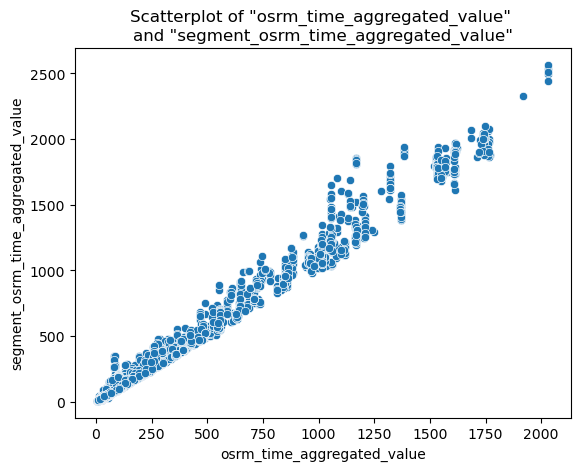

In [142]:
r = pearsonr(osrm_time_aggregated_value, segment_osrm_time_aggregated_value)
sns.scatterplot(x = osrm_time_aggregated_value, y = segment_osrm_time_aggregated_value)
plt.xlabel('osrm_time_aggregated_value')
plt.ylabel('segment_osrm_time_aggregated_value')
plt.title('Scatterplot of "osrm_time_aggregated_value" \nand "segment_osrm_time_aggregated_value"')
plt.show()

### `"osrm_time_aggregated_value" and "segment_osrm_time_aggregated_value" have a strong positive linear correlation with Pearson's coefficient = 0.994`
### As `"segment_osrm_time_aggregated_value"` increases, `"osrm_time_aggregated_value"` also increases.

In [143]:
final_data.columns

Index(['trip_creation_year', 'trip_creation_month', 'trip_creation_day',
       'trip_uuid', 'source_city', 'source_place', 'source_code',
       'source_state', 'destination_city', 'destination_place',
       'destination_code', 'destination_state', 'route_type', 'od_duration',
       'actual_distance_to_destination', 'start_scan_to_end_scan',
       'osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time_total', 'segment_osrm_time_total',
       'segment_osrm_distance_total', 'segments', 'Carting', 'FTL'],
      dtype='object')

## `Column Normalization/Column Standardization`

In [144]:
numerical_columns = ['od_duration', 'actual_distance_to_destination', 'start_scan_to_end_scan', 
                     'osrm_distance', 'actual_time', 'osrm_time', 'segment_actual_time_total',
                     'segment_osrm_time_total', 'segment_osrm_distance_total', 'segments']
rem_columns = [col for col in final_data.columns if col not in numerical_columns]

scaler = StandardScaler()
std_data = scaler.fit_transform(final_data[numerical_columns])
std_data = pd.DataFrame(std_data, columns = numerical_columns)
std_data = final_data[rem_columns].join(std_data)
std_data

,trip_creation_year,trip_creation_month,trip_creation_day,trip_uuid,source_city,source_place,source_code,source_state,destination_city,destination_place,...,od_duration,actual_distance_to_destination,start_scan_to_end_scan,osrm_distance,actual_time,osrm_time,segment_actual_time_total,segment_osrm_time_total,segment_osrm_distance_total,segments
0,2018,9,12,trip-153671041653548748,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,...,2.145841,1.596395,2.161369,1.564433,1.672548,1.586377,1.674342,1.989785,1.987052,1.599505
1,2018,9,12,trip-153671042288605164,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,...,-0.554197,-0.396581,-0.548793,-0.415027,-0.440915,-0.430749,-0.441802,-0.451739,-0.423453,-0.212888
2,2018,9,12,trip-153671043369099517,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,...,4.320751,4.533411,4.343578,4.580304,4.331133,4.568736,4.321403,4.405418,4.375154,4.620159
3,2018,9,12,trip-153671090980523004,Pune,North,D3,Maharashtra,PNQ,Rahatani,...,-0.695345,-0.554639,-0.689581,-0.560329,-0.564536,-0.583155,-0.563627,-0.576016,-0.551361,-0.575367
4,2018,9,12,trip-153671121411074590,Hyderabad,Shamshbd,H,Telangana,Bengaluru,Nelmngla,...,0.504002,0.667494,0.513632,0.583111,0.551027,0.645051,0.552350,0.653808,0.627859,0.632895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8256,2018,10,3,trip-153861033690433192,Chennai,Hub,,Tamil Nadu,MAA,Poonamallee,...,-0.584431,-0.503697,-0.577472,-0.516068,-0.499002,-0.532353,-0.498954,-0.526823,-0.505014,-0.454541
8257,2018,10,3,trip-153861034802474617,Hapur,Swargash,D,Uttar Pradesh,Ghaziabad,Mohan Nagar,...,-0.596827,-0.473698,-0.590508,-0.499343,-0.470703,-0.484539,-0.471882,-0.490576,-0.492885,-0.394128
8258,2018,10,3,trip-153861055072891350,Mumbai,Chndivli,PC,Maharashtra,Bhiwandi,Mankoli,...,-0.541293,-0.537653,-0.534454,-0.547435,-0.567514,-0.577178,-0.566635,-0.568249,-0.535416,-0.514954
8259,2018,10,3,trip-153861089403973335,Vadodara,Karelibaug,DPC,Gujarat,Anand,Vaghasi,...,-0.661868,-0.500768,-0.655688,-0.502296,-0.580919,-0.526376,-0.581675,-0.516467,-0.489974,-0.454541


## `From which state, most orders are coming from ??`
- ### `Maharashtra, Karnataka, Haryana, Tamil Nadu and Telangana are the top 5 states from where most of the orders are coming from`

In [145]:
final_data['destination_state'].value_counts()[:5]

Maharashtra    1612
Haryana        1246
Karnataka       709
Tamil Nadu      604
West Bengal     463
Name: destination_state, dtype: int64

## `Busiest corridor, average distance between them, average time taken`

In [146]:
source_dest_freq = final_data[['source_city', 'destination_city']].value_counts().reset_index().rename(columns = {0: 'trip_count'})
source_dest_freq

,source_city,destination_city,trip_count
0,Bhiwandi,Mumbai,437
1,Mumbai,Bhiwandi,270
2,Gurgaon,Delhi,263
3,Delhi,Gurgaon,261
4,MAA,Chennai,178
...,...,...,...
1423,Jangipur,Baharampur,1
1424,Jasai,Mumbai,1
1425,Jath,Kolhapur,1
1426,Jeypore,Pappadahandi,1


In [147]:
symm_trip_pairs = source_dest_freq.merge(source_dest_freq, how = "left", 
                                         left_on = ["source_city", "destination_city"], 
                                         right_on = ["destination_city", "source_city"])
symm_trip_pairs = (symm_trip_pairs.loc[(symm_trip_pairs['source_city_y'].isnull()) 
                                      | (symm_trip_pairs['source_city_x'] < symm_trip_pairs['destination_city_x']),
                                      ['source_city_x', 'destination_city_x', 'trip_count_x', 'trip_count_y']]
                   .rename(columns = {'source_city_x': 'source_city', 
                                      'destination_city_x': 'destination_city'}))
symm_trip_pairs['trip_count_x'] = symm_trip_pairs['trip_count_x'] + symm_trip_pairs['trip_count_y'].fillna(0)
symm_trip_pairs = (symm_trip_pairs[['source_city', 'destination_city', 'trip_count_x']]
                   .rename(columns = {'source_city': 'source/destination', 
                                      'destination_city': 'destination/source', 
                                      'trip_count_x': 'trip_count'}).sort_values(['trip_count'], ascending = False))
symm_trip_pairs

,source/destination,destination/source,trip_count
0,Bhiwandi,Mumbai,707.0
3,Delhi,Gurgaon,524.0
6,Chennai,MAA,293.0
9,Gurgaon,Sonipat,178.0
19,PNQ,Pune,172.0
...,...,...,...
994,Coimbatore,Kotagiri,1.0
991,Chotila,Surendranagar,1.0
990,Chotila,Limbdi,1.0
989,Chomu,Sujangarh,1.0


### `Bhiwandi <--> Mumbai` is the busiest corridor in terms of the frequency of business orders
### `Average distance between Mumbai and Bhiwandi is 21.53`
### `Average time taken to travel the distance between Mumbai and Bhiwandi is 77.23 minutes`

In [148]:
final_data.loc[((final_data['source_city'] == 'Bhiwandi') & (final_data['destination_city'] == 'Mumbai')) 
               | ((final_data['source_city'] == 'Mumbai') & (final_data['destination_city'] == 'Bhiwandi')), 
               ['actual_distance_to_destination', 'actual_time']].mean()

actual_distance_to_destination    21.537896
actual_time                       77.234972
dtype: float64